# Task 2: Decision Trees for Human Activity Recognition 

## 1.Creating Decision Tree using SkLearn

### Decision Tree 1: Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

#### Importing libraries

In [47]:
import sklearn as skl
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from MakeDataset import X_train,X_test,y_train,y_test
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
activities=["Walking","Walking Upstairs","Walking Downstairs","Sitting","Standing","Laying"]


#### Normalization

In [95]:
X_train_f=X_train.reshape(-1,3)
X_test_f=X_test.reshape(-1,3)

In [97]:
scaler=StandardScaler()
X_train_f_n=scaler.fit_transform(X_train_f)
X_test_f_n=scaler.transform(X_test_f)
X_train_n_3d=X_train_f_n.reshape(126,500,3)
X_train_f_n_rs=X_train_n_3d.reshape(126,1500)
X_test_n_3d=X_test_f_n.reshape(54,500,3)
X_test_f_n_rs=X_test_n_3d.reshape(54,1500)

In [98]:
x=X_train_f_n_rs
y=y_train
xt=X_test_f_n_rs

In [85]:
# def my_normalise(acc_tr,acc_te):
#     meany=np.mean(acc_tr)
#     stdy=np.std(acc_tr)
#     acc__tr_n=(acc_tr-meany)/(stdy)
#     acc_te_n=(acc_te-meany)/(stdy)
#     return acc__tr_n,acc_te_n



In [86]:
# acc_x_tr=[]
# acc_y_tr=[]
# acc_z_tr=[]
# for i in range(126):
#     for j in range(500):
#         acc_x_tr.append(X_train[i][j][0])
#         acc_y_tr.append(X_train[i][j][1])
#         acc_z_tr.append(X_train[i][j][2])
# acc_x_te=[]
# acc_y_te=[]
# acc_z_te=[]
# for i in range(54):
#     for j in range(500):
#         acc_x_te.append(X_test[i][j][0])
#         acc_y_te.append(X_test[i][j][1])
#         acc_z_te.append(X_test[i][j][2])



In [87]:
# acc_x_tr_n,acc_x_te_n=my_normalise(acc_x_tr,acc_x_te)
# acc_y_tr_n,acc_y_te_n=my_normalise(acc_y_tr,acc_y_te)
# acc_z_tr_n,acc_z_te_n=my_normalise(acc_z_tr,acc_z_te)
# acc_x_tr_n=np.array(acc_x_tr_n)
# acc_y_tr_n=np.array(acc_y_tr_n)
# acc_z_tr_n=np.array(acc_z_tr_n)
# acc_x_te_n=np.array(acc_x_te_n)
# acc_y_te_n=np.array(acc_y_te_n)
# acc_z_te_n=np.array(acc_z_te_n)


In [90]:
# #For Task3
# meanx=np.mean(acc_x_tr)
# meany=np.mean(acc_y_tr)
# meanz=np.mean(acc_z_tr)
# stdx=np.std(acc_x_tr)
# stdy=np.std(acc_y_tr)
# stdz=np.std(acc_z_tr)
# joblib.dump({'Mean_X':meanx,'Std_X':stdx,'Mean_Y':meany,'Std_Y':stdy,'Mean_Z':meanz,'Std_Z':stdz},'For_Normalising.pkl')

['For_Normalising.pkl']

Reshaping the normalised data to 3d-training data shape

In [ ]:
# stacked_tr=np.stack((acc_x_tr_n,acc_y_tr_n,acc_z_tr_n),axis=1)
# X_train_n=stacked_tr.reshape(126,500,3)
# X_train_n_rs=X_train_n.reshape(126,1500)
# stacked_te=np.stack((acc_x_te_n,acc_y_te_n,acc_z_te_n),axis=1)
# X_test_n=stacked_te.reshape(54,500,3)
# X_test_n_rs=X_test_n.reshape(54,1500)
# # print(X_train.reshape(126,1500))
# # print(X_train_n_rs)
# # print(X_test.reshape(54,1500))
# # print(X_test_n_rs)

In [ ]:
# x=X_train_n_rs
# y=y_train
# xt=X_test_n_rs

#### Using Gini

##### Making Decision Tree

In [99]:
sk_dt_g1=tree.DecisionTreeClassifier(criterion="gini",random_state=42)
sk_dt1_g=sk_dt_g1.fit(x,y)
depth=sk_dt1_g.get_depth()
print("Depth of Decision Tree:",depth)
joblib.dump(sk_dt1_g,'t2_dt1_g.pkl')

Depth of Decision Tree: 8


['t2_dt1_g.pkl']

##### Decision Tree Plot

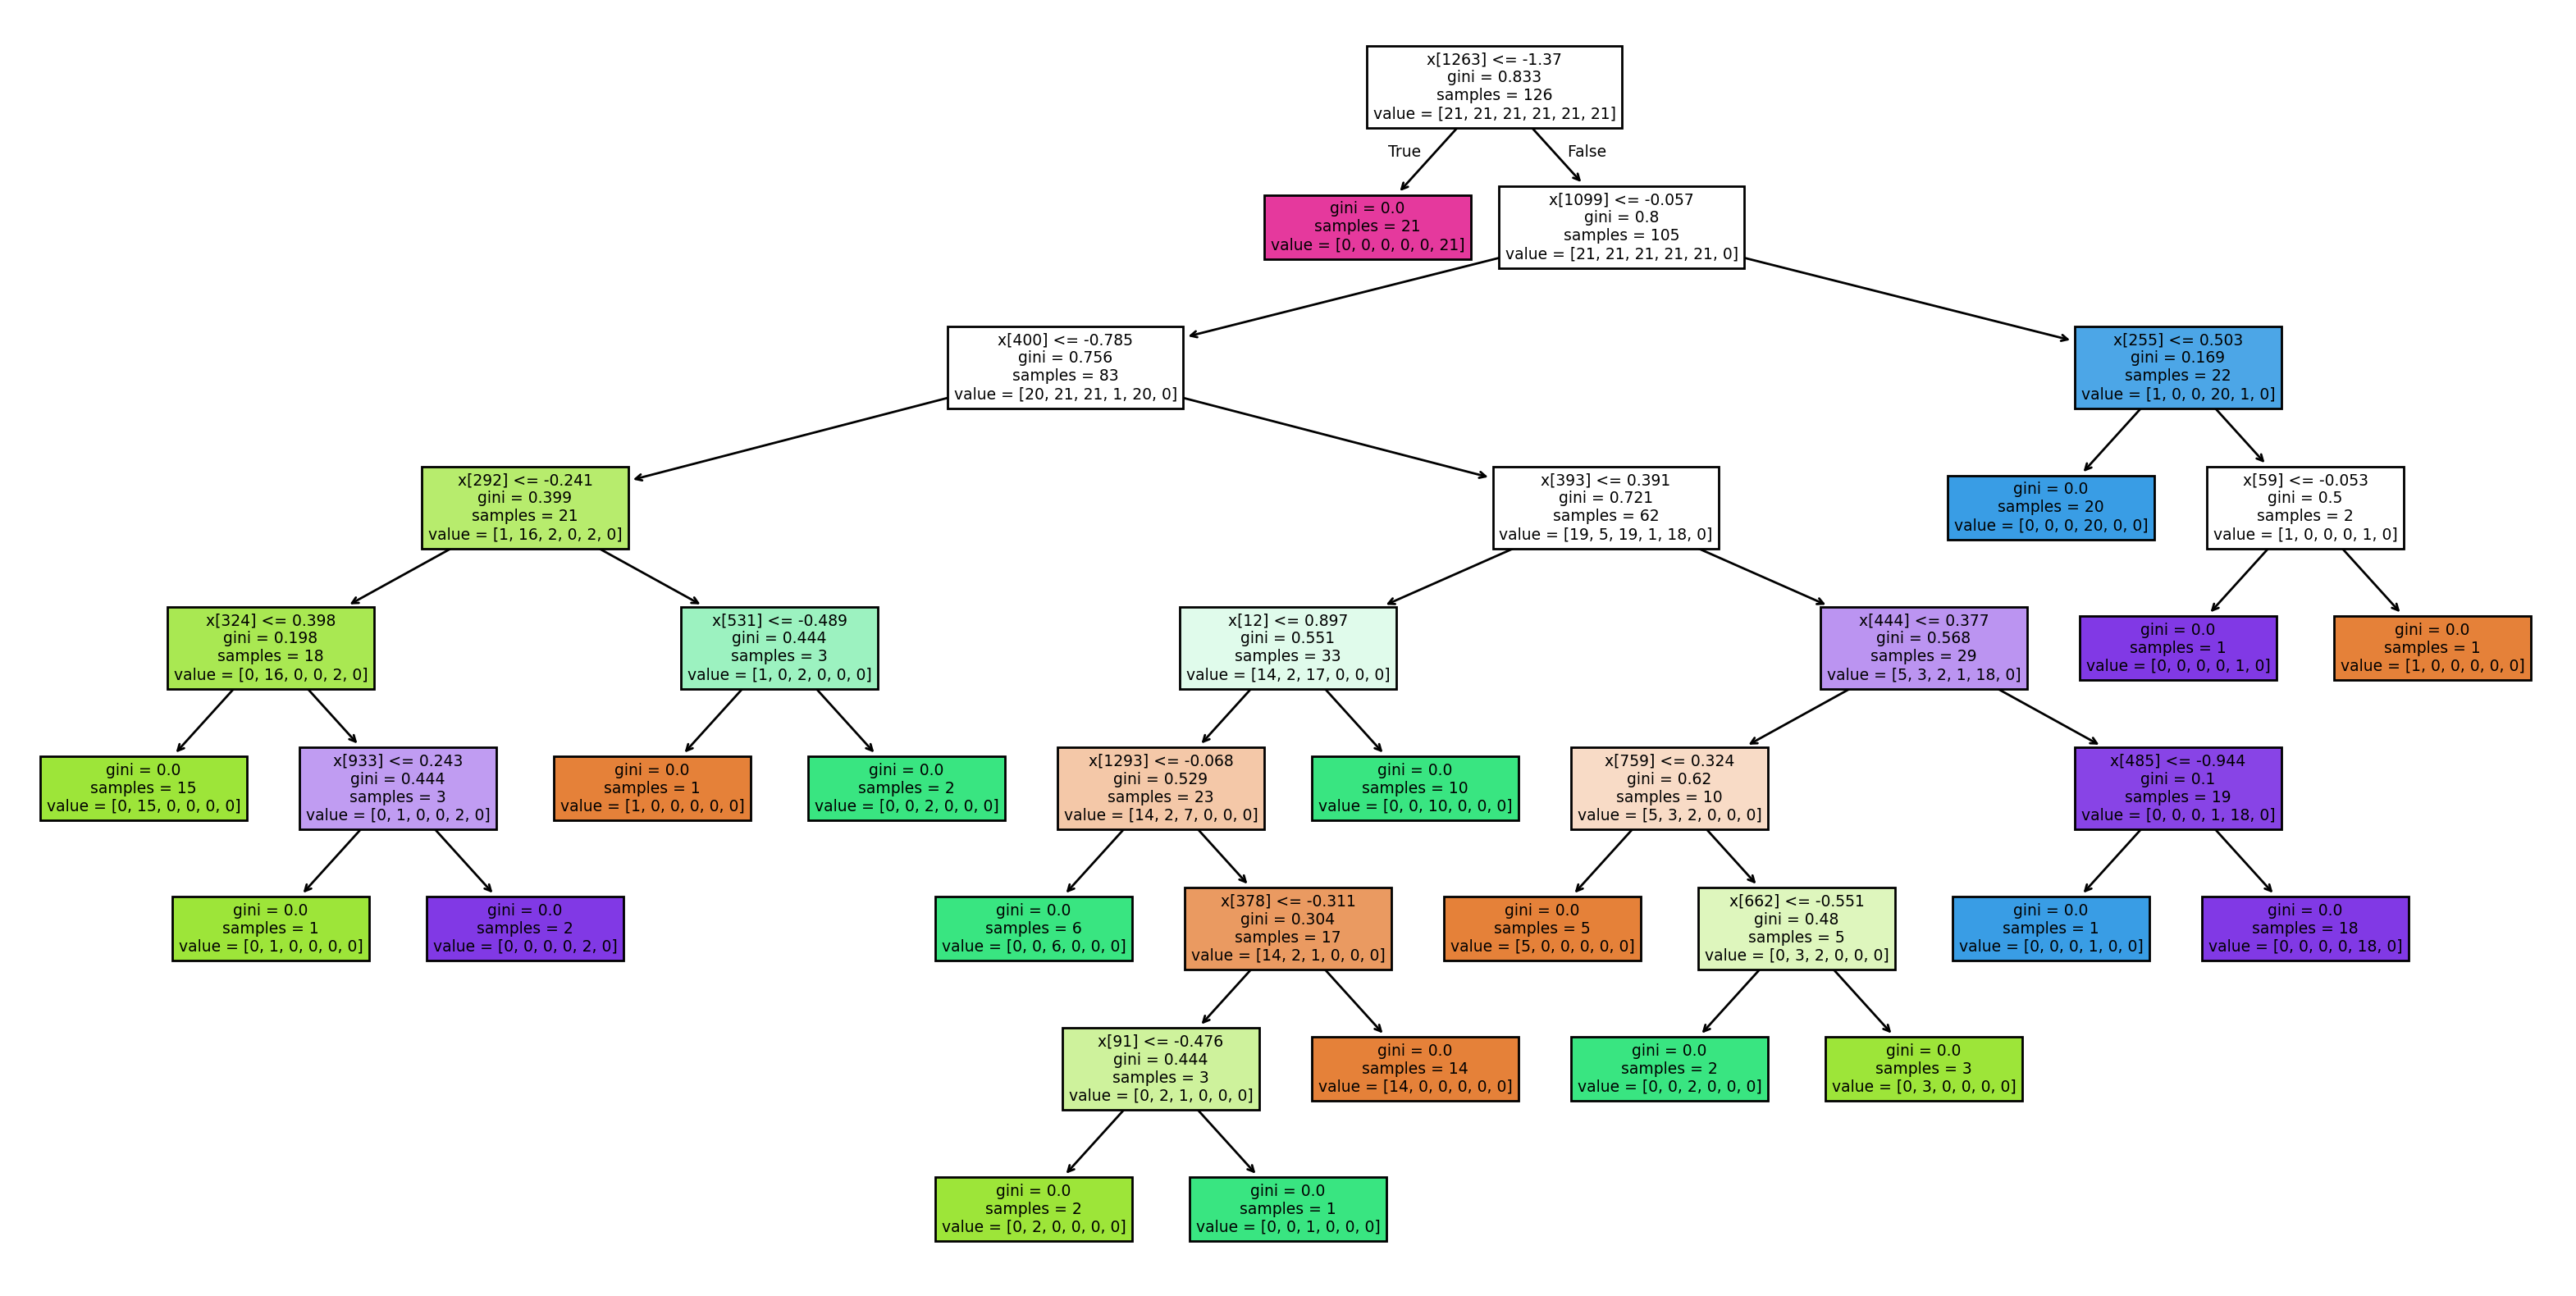

In [100]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt1_g, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  0.5370370370370371
Precision :  0.5567142008318479
Recall :  0.537037037037037


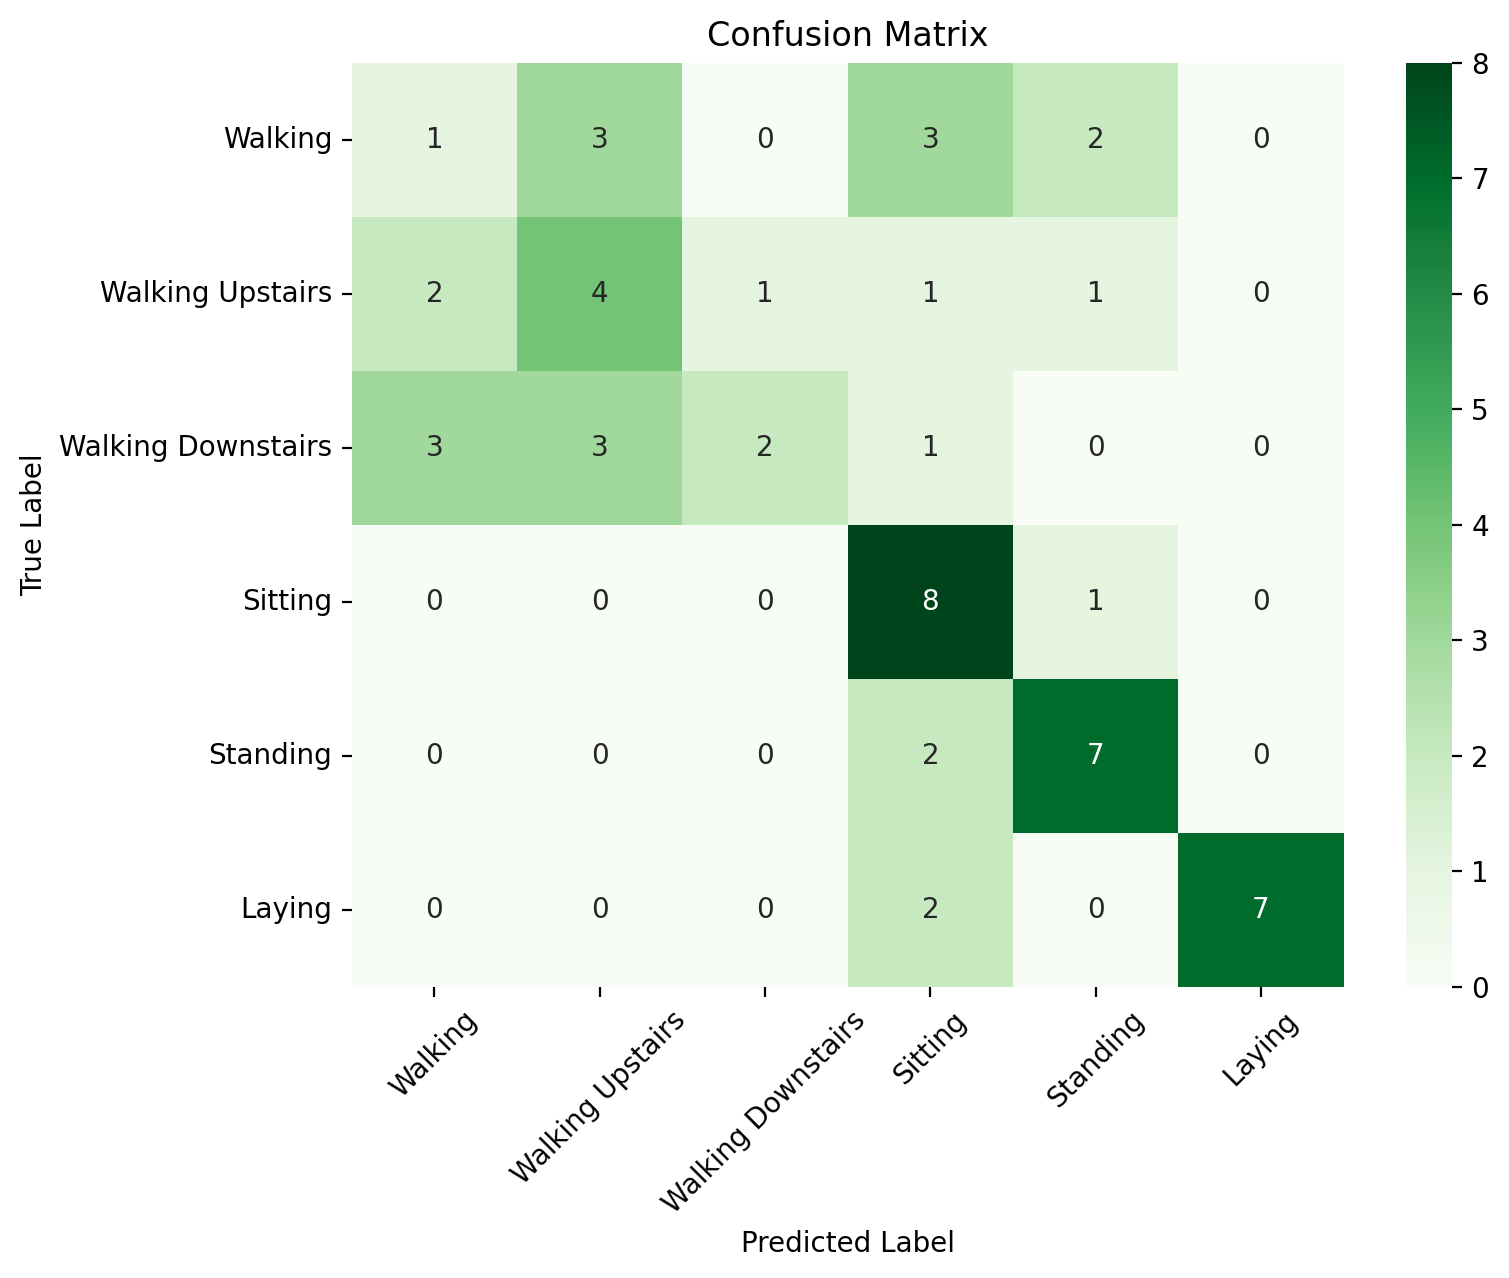

In [101]:

y_hat=sk_dt1_g.predict(xt)
a=skl.metrics.accuracy_score(y_test,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Using Entropy

##### Making Decision Tree

In [102]:
sk_dt_e1=tree.DecisionTreeClassifier(criterion="entropy",random_state=42)
sk_dt1_e=sk_dt_e1.fit(x,y)
depth=sk_dt1_e.get_depth()
print("Depth of Decision Tree:",depth)
joblib.dump(sk_dt1_e,'t2_dt1_e.pkl')

Depth of Decision Tree: 7


['t2_dt1_e.pkl']

##### Decision Tree Plot

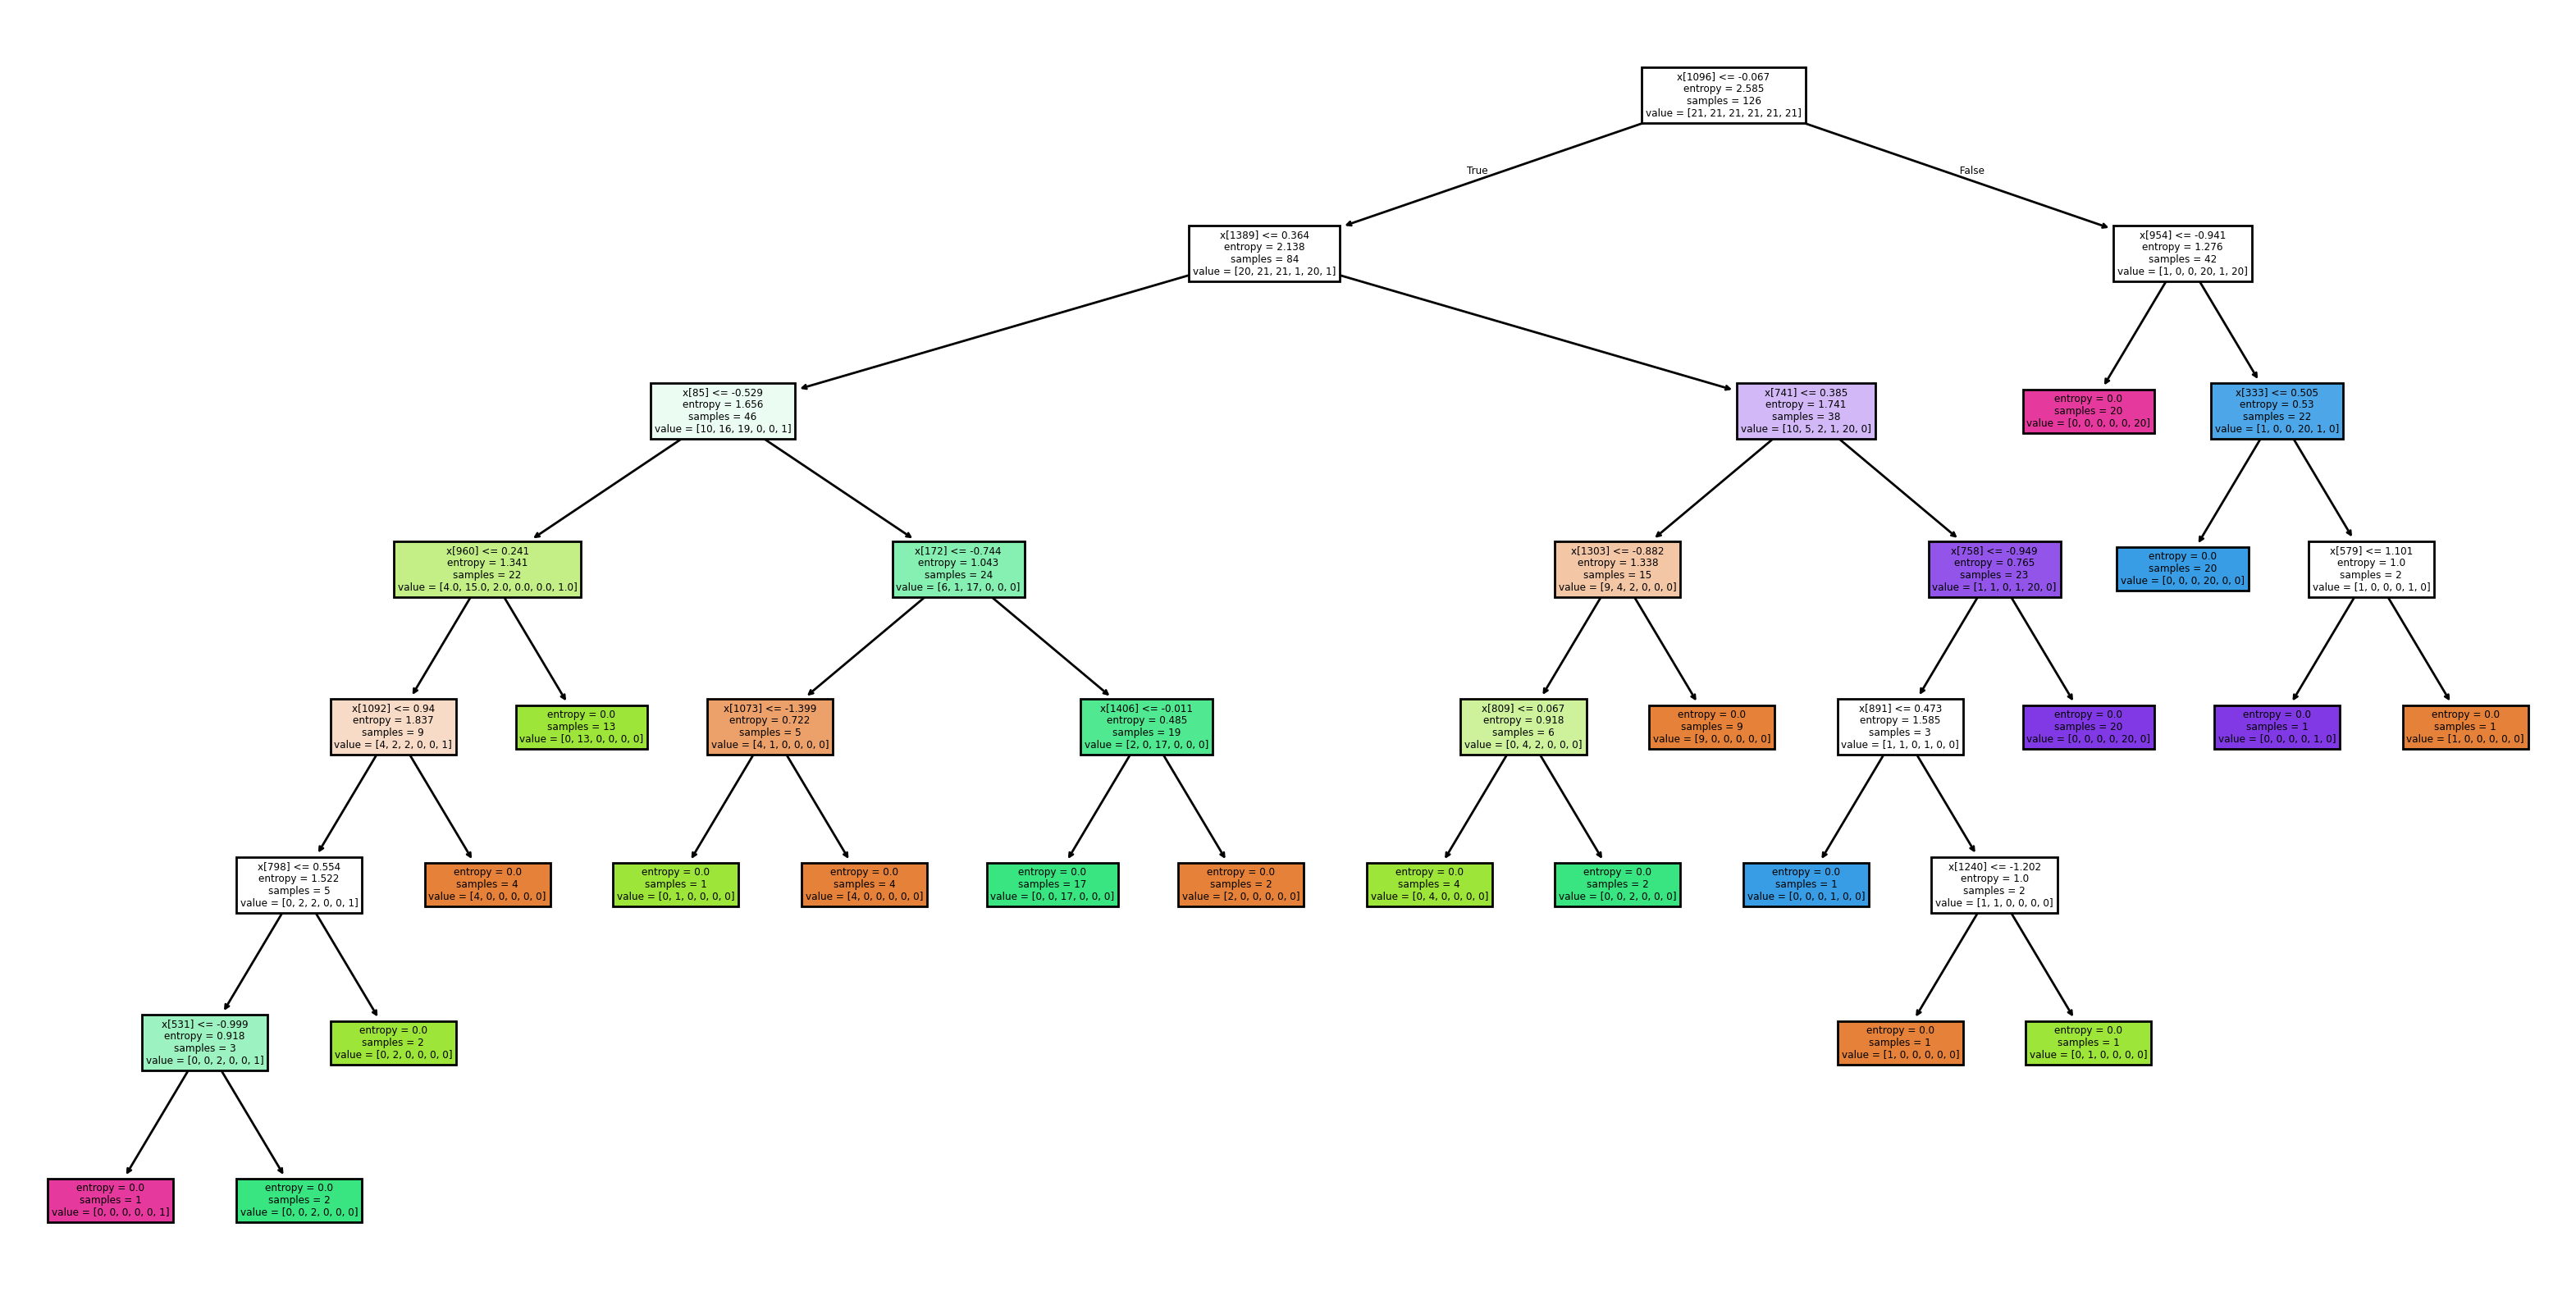

In [103]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt1_e, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  0.5925925925925926
Precision :  0.5282865282865282
Recall :  0.5925925925925926


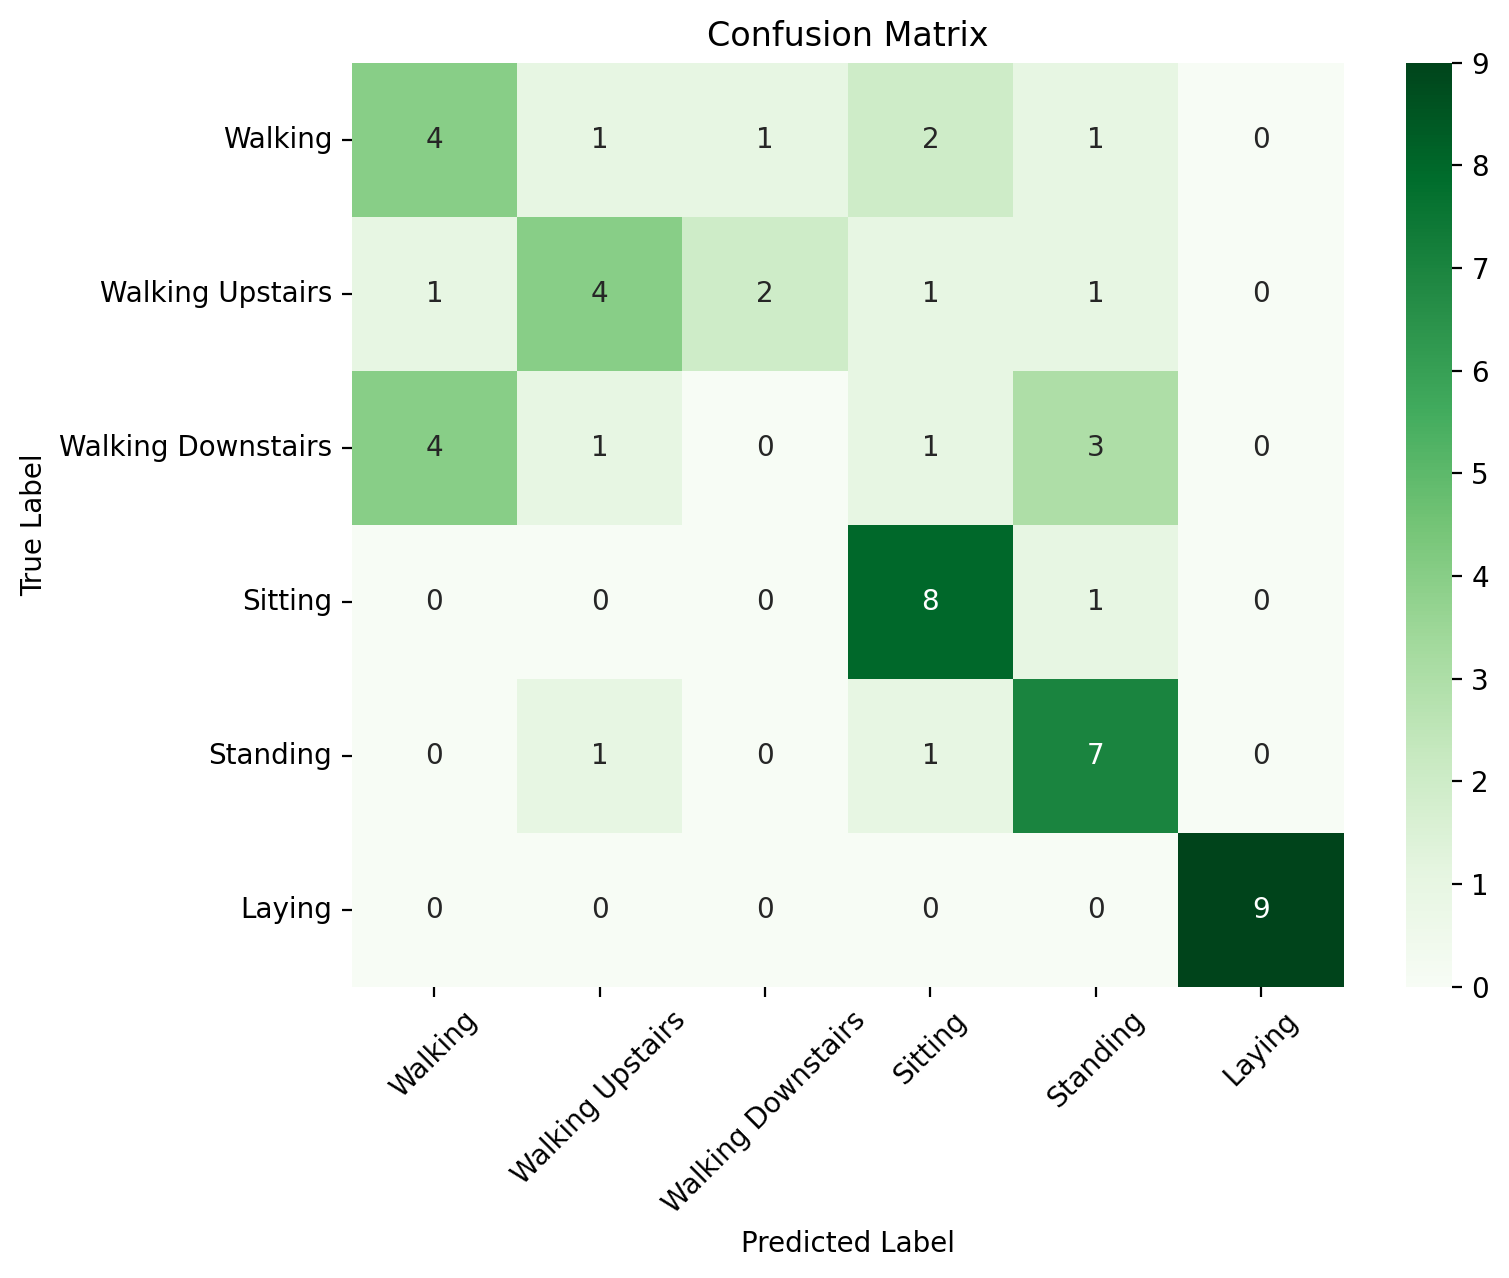

In [104]:

y_hat=sk_dt1_e.predict(xt)
a=skl.metrics.accuracy_score(y_test,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree 2: Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [59]:

X_Train_Tsfel=pd.read_csv("X_Train_Tsfel.csv")
X_Test_Tsfel=pd.read_csv("X_Test_Tsfel.csv")
Xtrain=pd.read_csv("x_tsfel.csv")
Xtest=pd.read_csv("x_tsfel_test.csv")



#### Normalizing

In [60]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_Train_Tsfel_n=scalar.fit_transform(Xtrain)
X_Test_Tsfel_n=scalar.transform(Xtest)
x2=X_Train_Tsfel_n
xt2=X_Test_Tsfel_n

#### Using Gini

##### Making Decision Tree

In [61]:
sk_dt_g2=tree.DecisionTreeClassifier(criterion="gini",random_state=42)
sk_dt2_g=sk_dt_g2.fit(x2,y_train)
depth=sk_dt2_g.get_depth()
print("Depth of Decision Tree:",depth)

Depth of Decision Tree: 7


['t2_dt2_g.pkl']

##### Decision Tree Plot

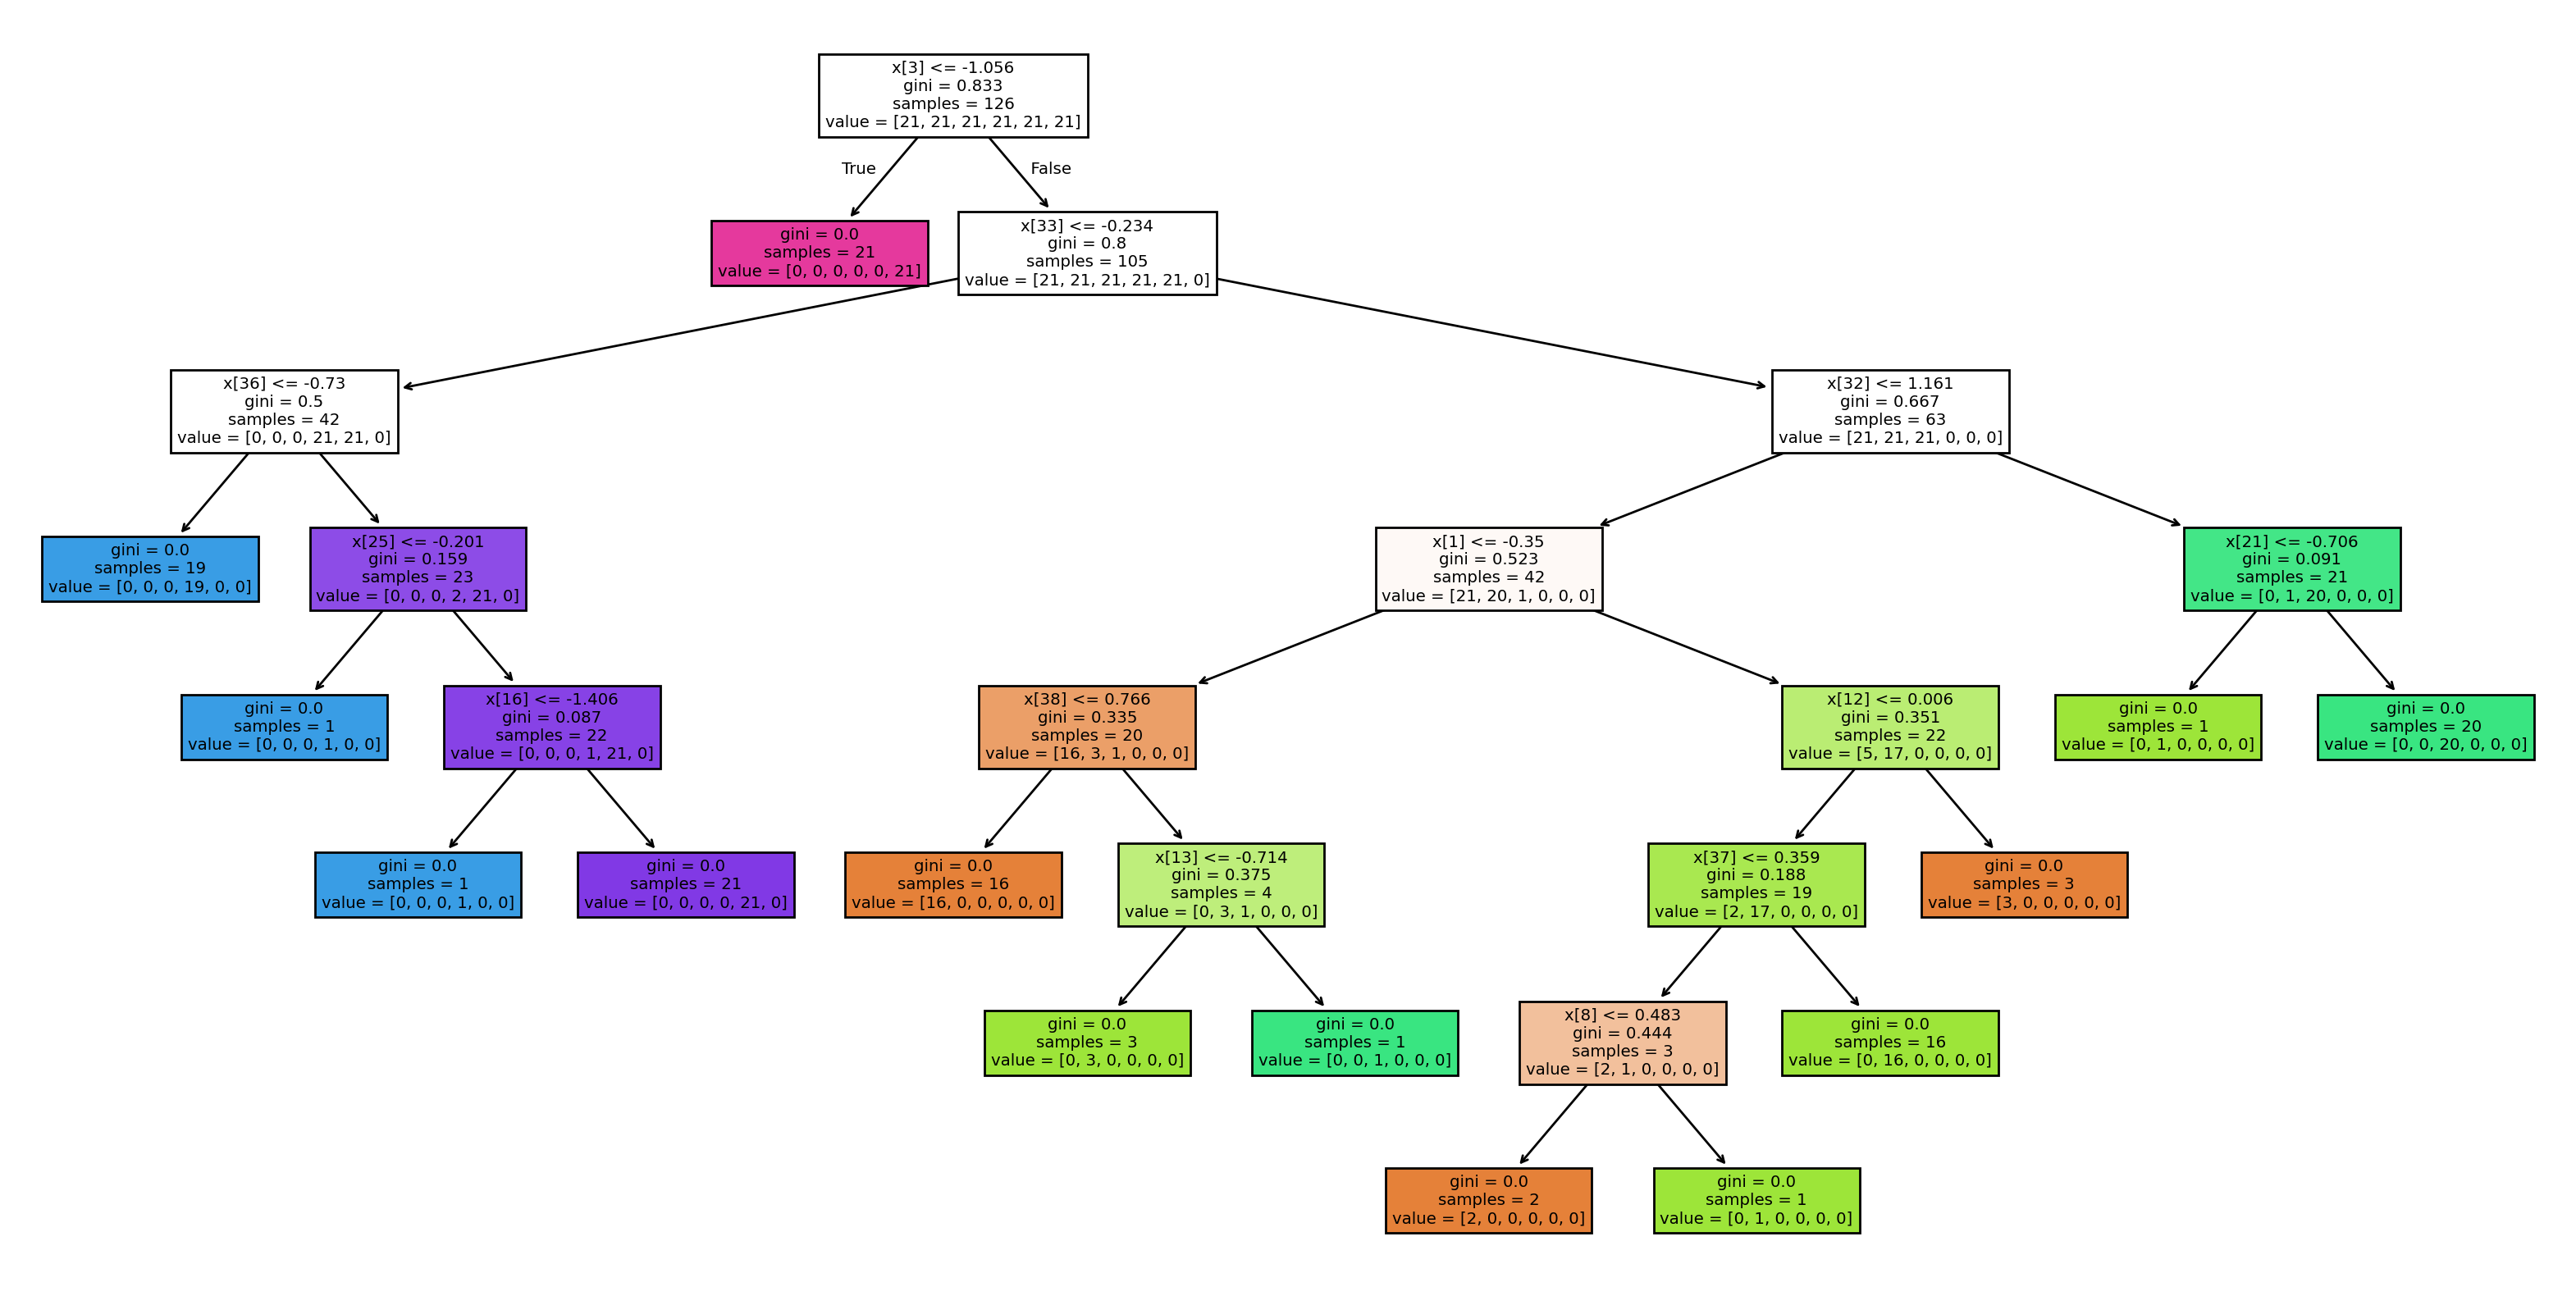

In [62]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt2_g, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  0.7962962962962963
Precision :  0.8018939393939394
Recall :  0.7962962962962963


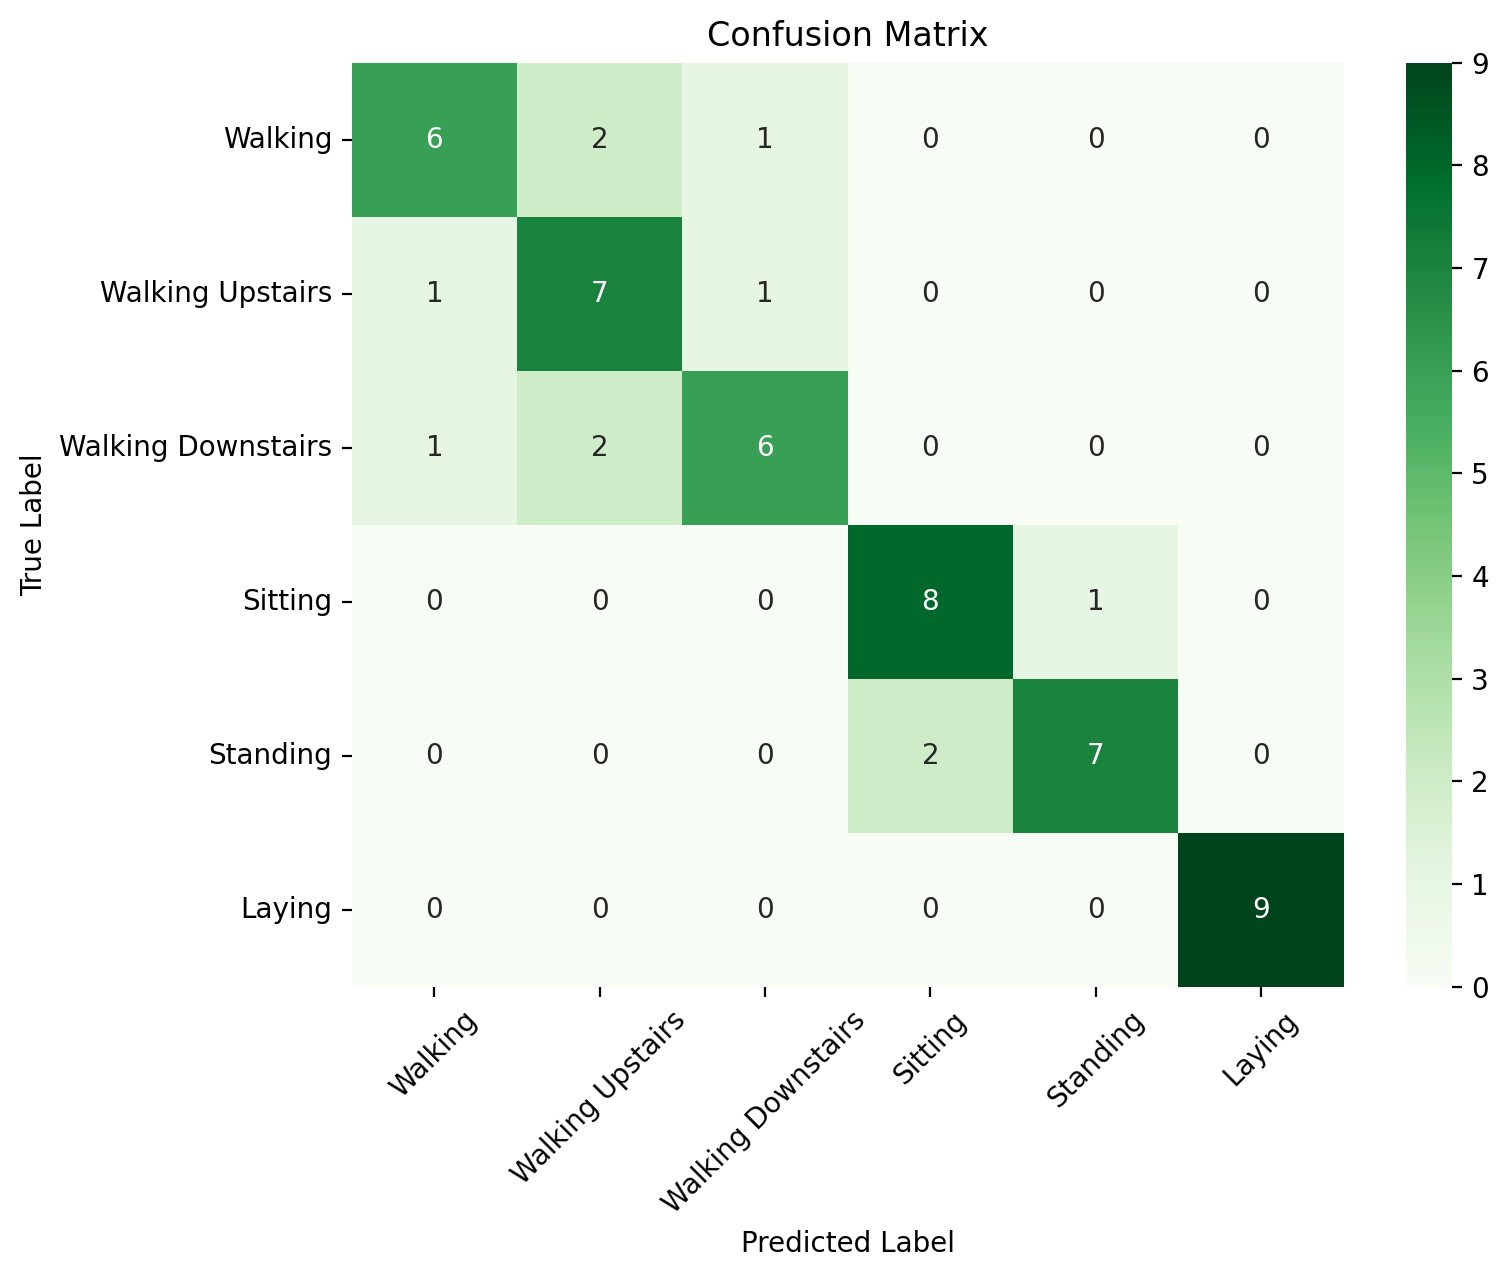

In [63]:

y_hat=sk_dt2_g.predict(xt2)
a=skl.metrics.accuracy_score(y_test,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Using Entropy

##### Making Decision Tree

In [64]:
sk_dt_e2=tree.DecisionTreeClassifier(criterion="entropy",random_state=42)
sk_dt2_e=sk_dt_e2.fit(x2,y_train)
depth=sk_dt2_e.get_depth()
print("Depth of Decision Tree:",depth)


Depth of Decision Tree: 6


['t2_dt2_e.pkl']

##### Decision Tree Plot

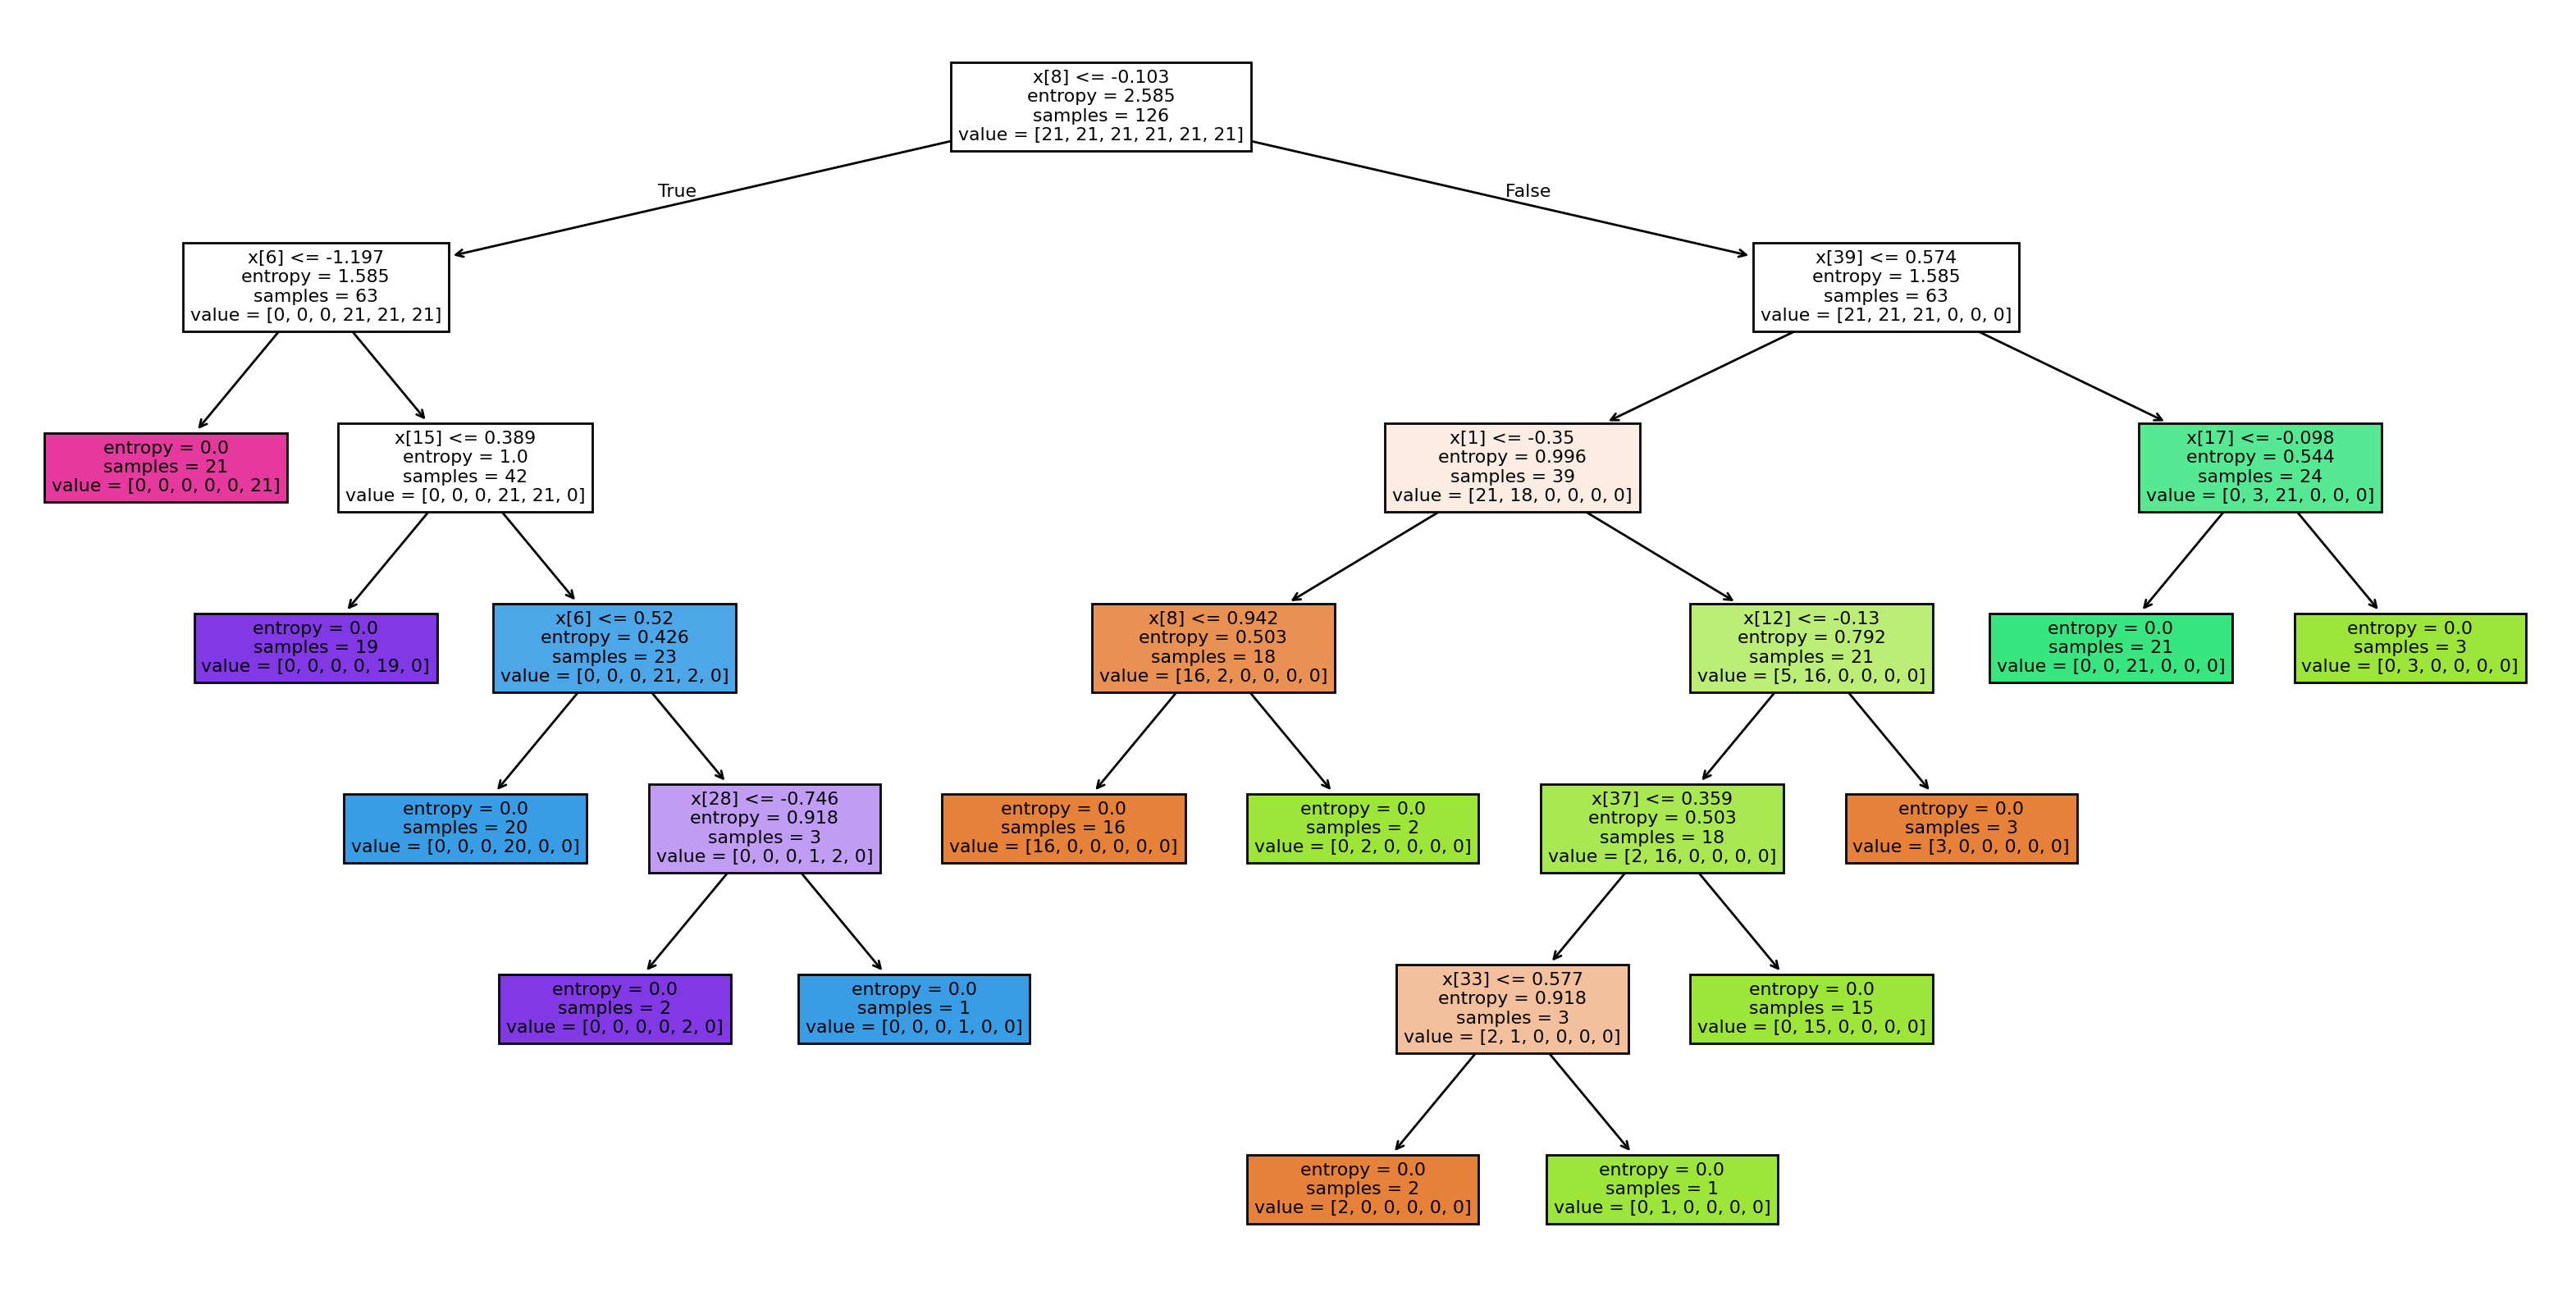

In [65]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt2_e, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  0.7592592592592593
Precision :  0.7725108225108226
Recall :  0.7592592592592592


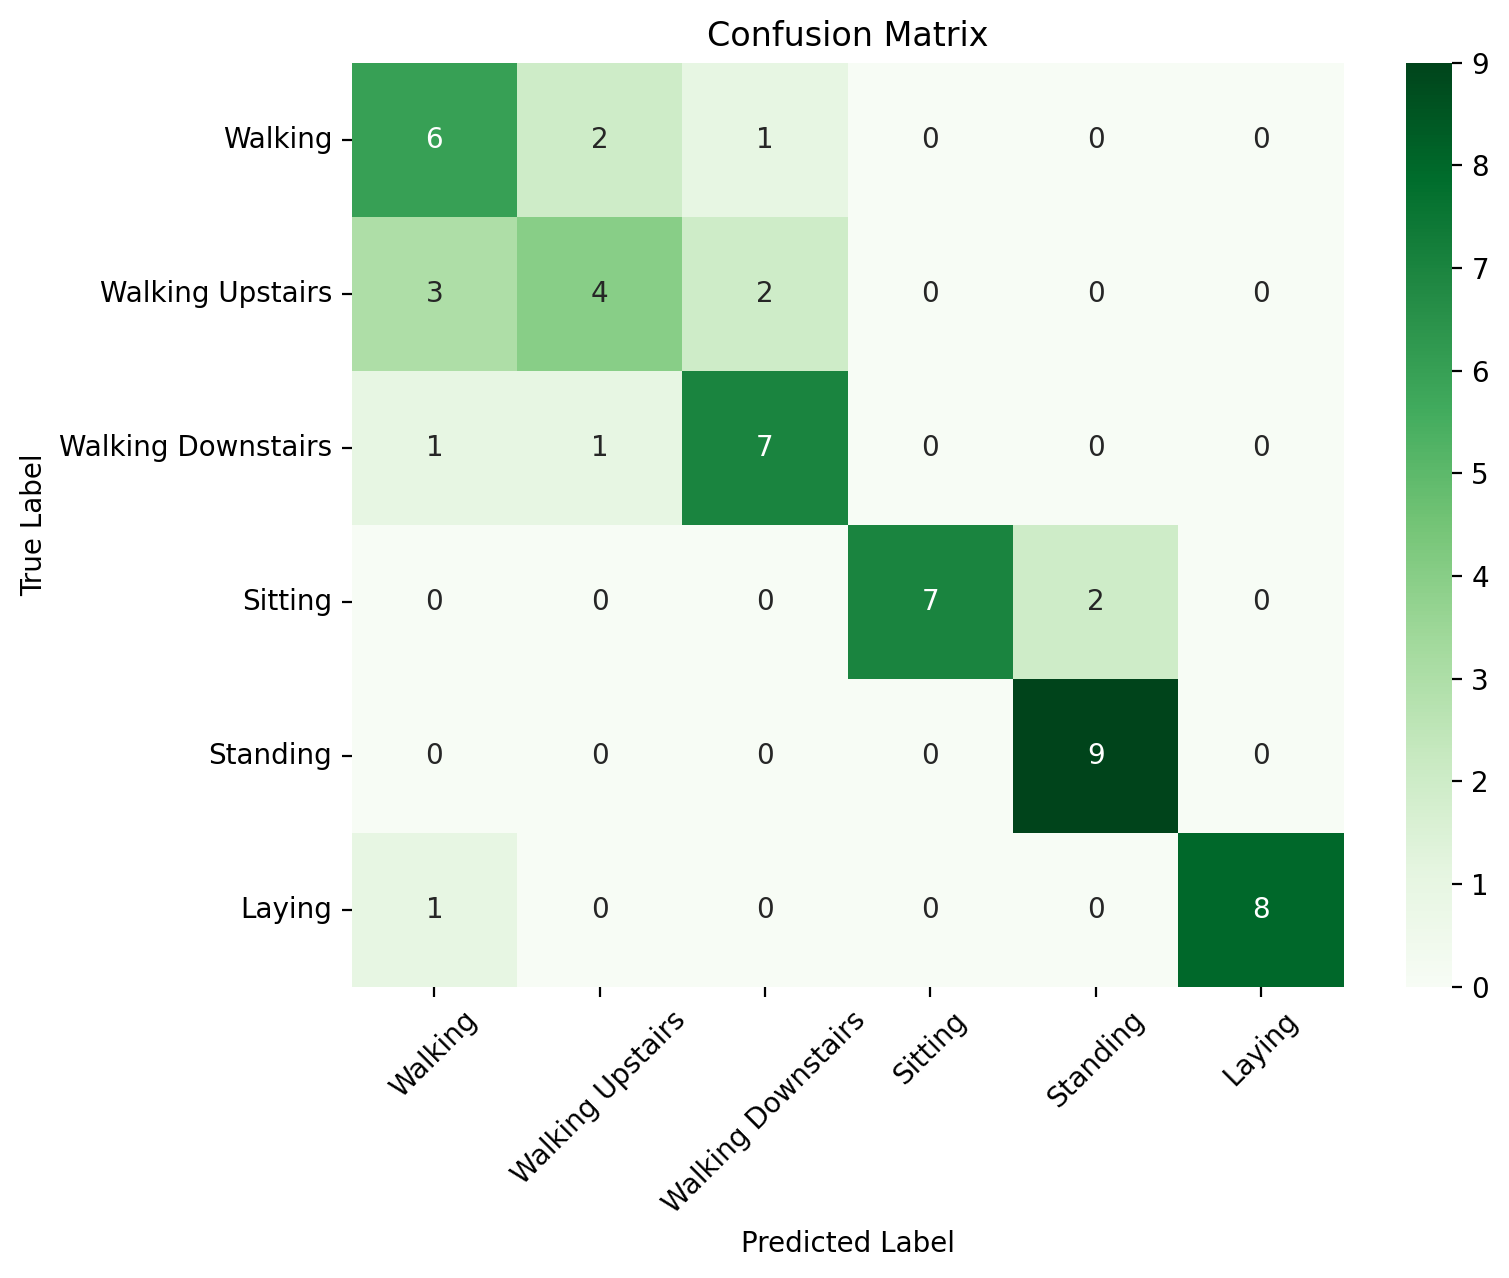

In [66]:

y_hat=sk_dt2_e.predict(xt2)
a=skl.metrics.accuracy_score(y_test,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree 3: Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

In [67]:
from Body_MakeDataset import Body_X_train,Body_X_test,Body_y_train,Body_y_test
from Gyro_MakeDataset import Gyro_X_train,Gyro_X_test

Extra_X_train=np.concatenate((Body_X_train,Gyro_X_train),axis=-1)
Extra_X_test=np.concatenate((Body_X_test,Gyro_X_test),axis=-1)


#### Normalising

In [68]:
body_x_tr=[]
body_y_tr=[]
body_z_tr=[]
gyro_x_tr=[]
gyro_y_tr=[]
gyro_z_tr=[]
for i in range(94):
    for j in range(500):
        body_x_tr.append(Extra_X_train[i][j][0])
        body_y_tr.append(Extra_X_train[i][j][1])
        body_z_tr.append(Extra_X_train[i][j][2])
        gyro_x_tr.append(Extra_X_train[i][j][3])
        gyro_y_tr.append(Extra_X_train[i][j][4])
        gyro_z_tr.append(Extra_X_train[i][j][5])
body_x_te=[]
body_y_te=[]
body_z_te=[]
gyro_x_te=[]
gyro_y_te=[]
gyro_z_te=[]
for i in range(41):
    for j in range(500):
        body_x_te.append(Extra_X_test[i][j][0])
        body_y_te.append(Extra_X_test[i][j][1])
        body_z_te.append(Extra_X_test[i][j][2])
        gyro_x_te.append(Extra_X_test[i][j][3])
        gyro_y_te.append(Extra_X_test[i][j][4])
        gyro_z_te.append(Extra_X_test[i][j][5])



In [69]:
body_x_tr_n,body_x_te_n=my_normalise(body_x_tr,body_x_te)
body_y_tr_n,body_y_te_n=my_normalise(body_y_tr,body_y_te)
body_z_tr_n,body_z_te_n=my_normalise(body_z_tr,body_z_te)
gyro_x_tr_n,gyro_x_te_n=my_normalise(gyro_x_tr,gyro_x_te)
gyro_y_tr_n,gyro_y_te_n=my_normalise(gyro_y_tr,gyro_y_te)
gyro_z_tr_n,gyro_z_te_n=my_normalise(gyro_z_tr,gyro_z_te)

body_x_tr_n=np.array(body_x_tr_n)
body_y_tr_n=np.array(body_y_tr_n)
body_z_tr_n=np.array(body_z_tr_n)
body_x_te_n=np.array(body_x_te_n)
body_y_te_n=np.array(body_y_te_n)
body_z_te_n=np.array(body_z_te_n)

gyro_x_tr_n=np.array(gyro_x_tr_n)
gyro_y_tr_n=np.array(gyro_y_tr_n)
gyro_z_tr_n=np.array(gyro_z_tr_n)
gyro_x_te_n=np.array(gyro_x_te_n)
gyro_y_te_n=np.array(gyro_y_te_n)
gyro_z_te_n=np.array(gyro_z_te_n)

In [70]:
extra_stacked_tr=np.stack((body_x_tr_n,body_y_tr_n,body_z_tr_n,gyro_x_tr_n,gyro_y_tr_n,gyro_z_tr_n),axis=1)
extra_X_train_n=extra_stacked_tr.reshape(94,500,6)
extra_X_train_n_rs=extra_X_train_n.reshape(94,3000)
extra_stacked_te=np.stack((body_x_te_n,body_y_te_n,body_z_te_n,gyro_x_te_n,gyro_y_te_n,gyro_z_te_n),axis=1)
extra_X_test_n=extra_stacked_te.reshape(41,500,6)
extra_X_test_n_rs=extra_X_test_n.reshape(41,3000)


In [71]:
x_n=extra_X_train_n_rs
y_n=Body_y_train
xt_n=extra_X_test_n_rs

#### Using Gini

##### Making Decision Tree

In [72]:
sk_dt_g3=tree.DecisionTreeClassifier(criterion="gini",random_state=42)
sk_dt3_g=sk_dt_g3.fit(x_n,y_n)
depth=sk_dt3_g.get_depth()
print("Depth of Decision Tree:",depth)


Depth of Decision Tree: 6


['t2_dt3_g.pkl']

##### Decision Tree Plot

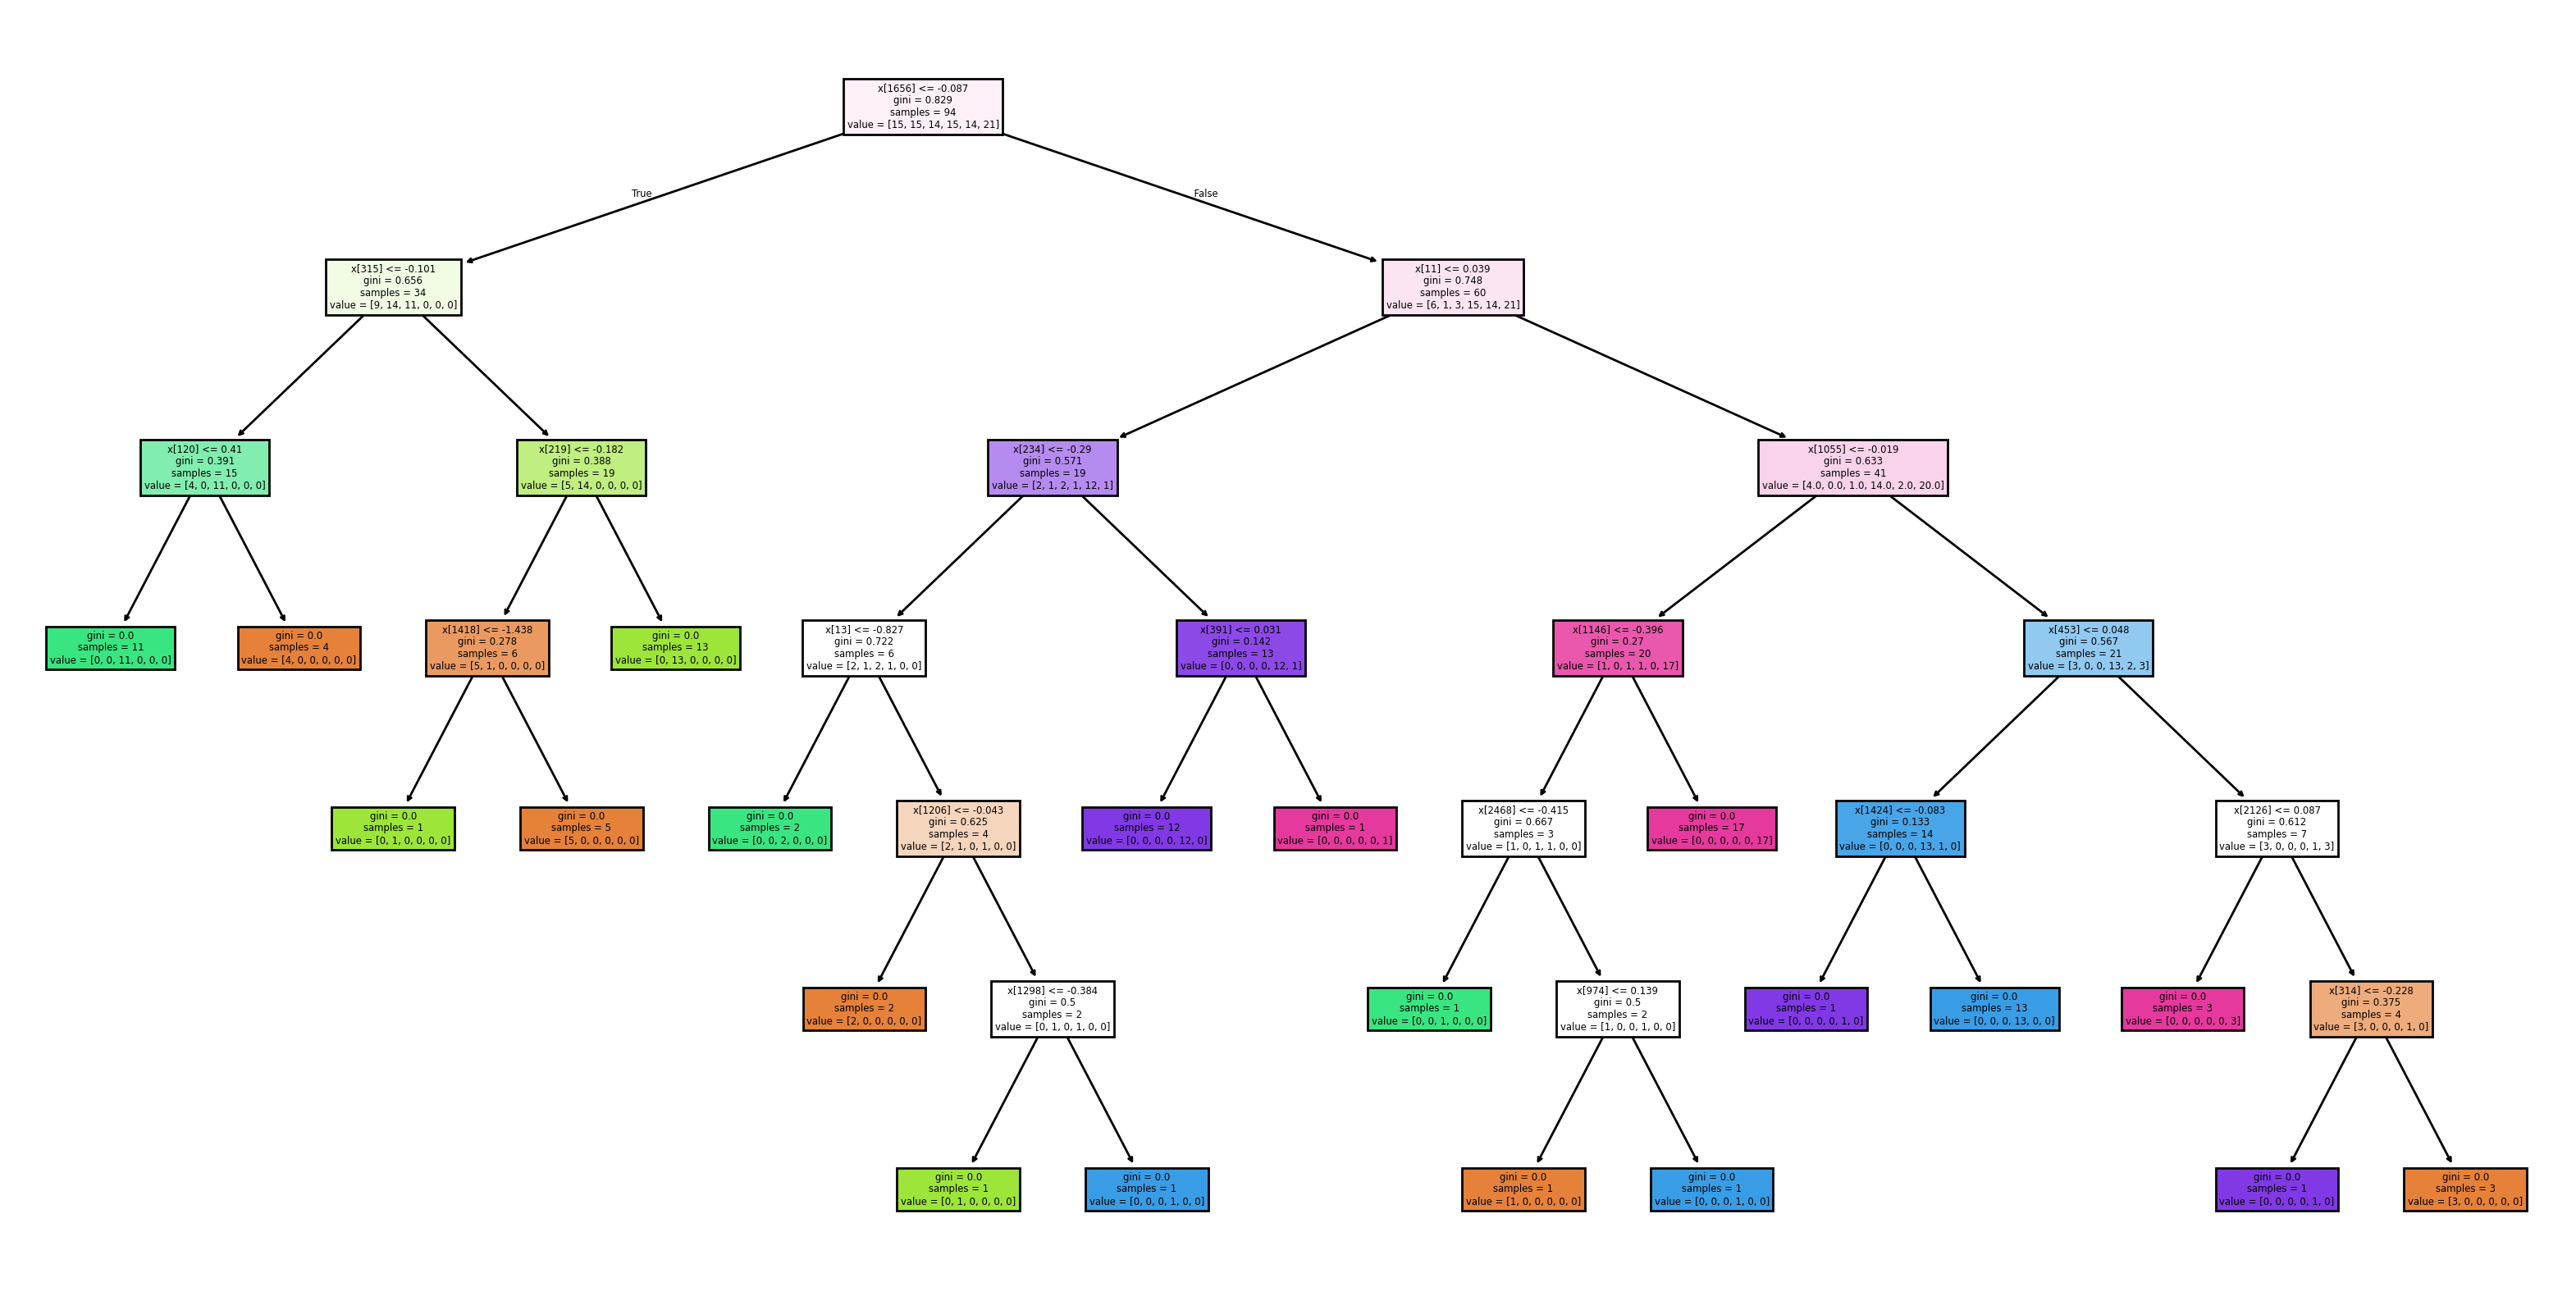

In [73]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt3_g, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  0.6341463414634146
Precision :  0.6323232323232323
Recall :  0.6164021164021164


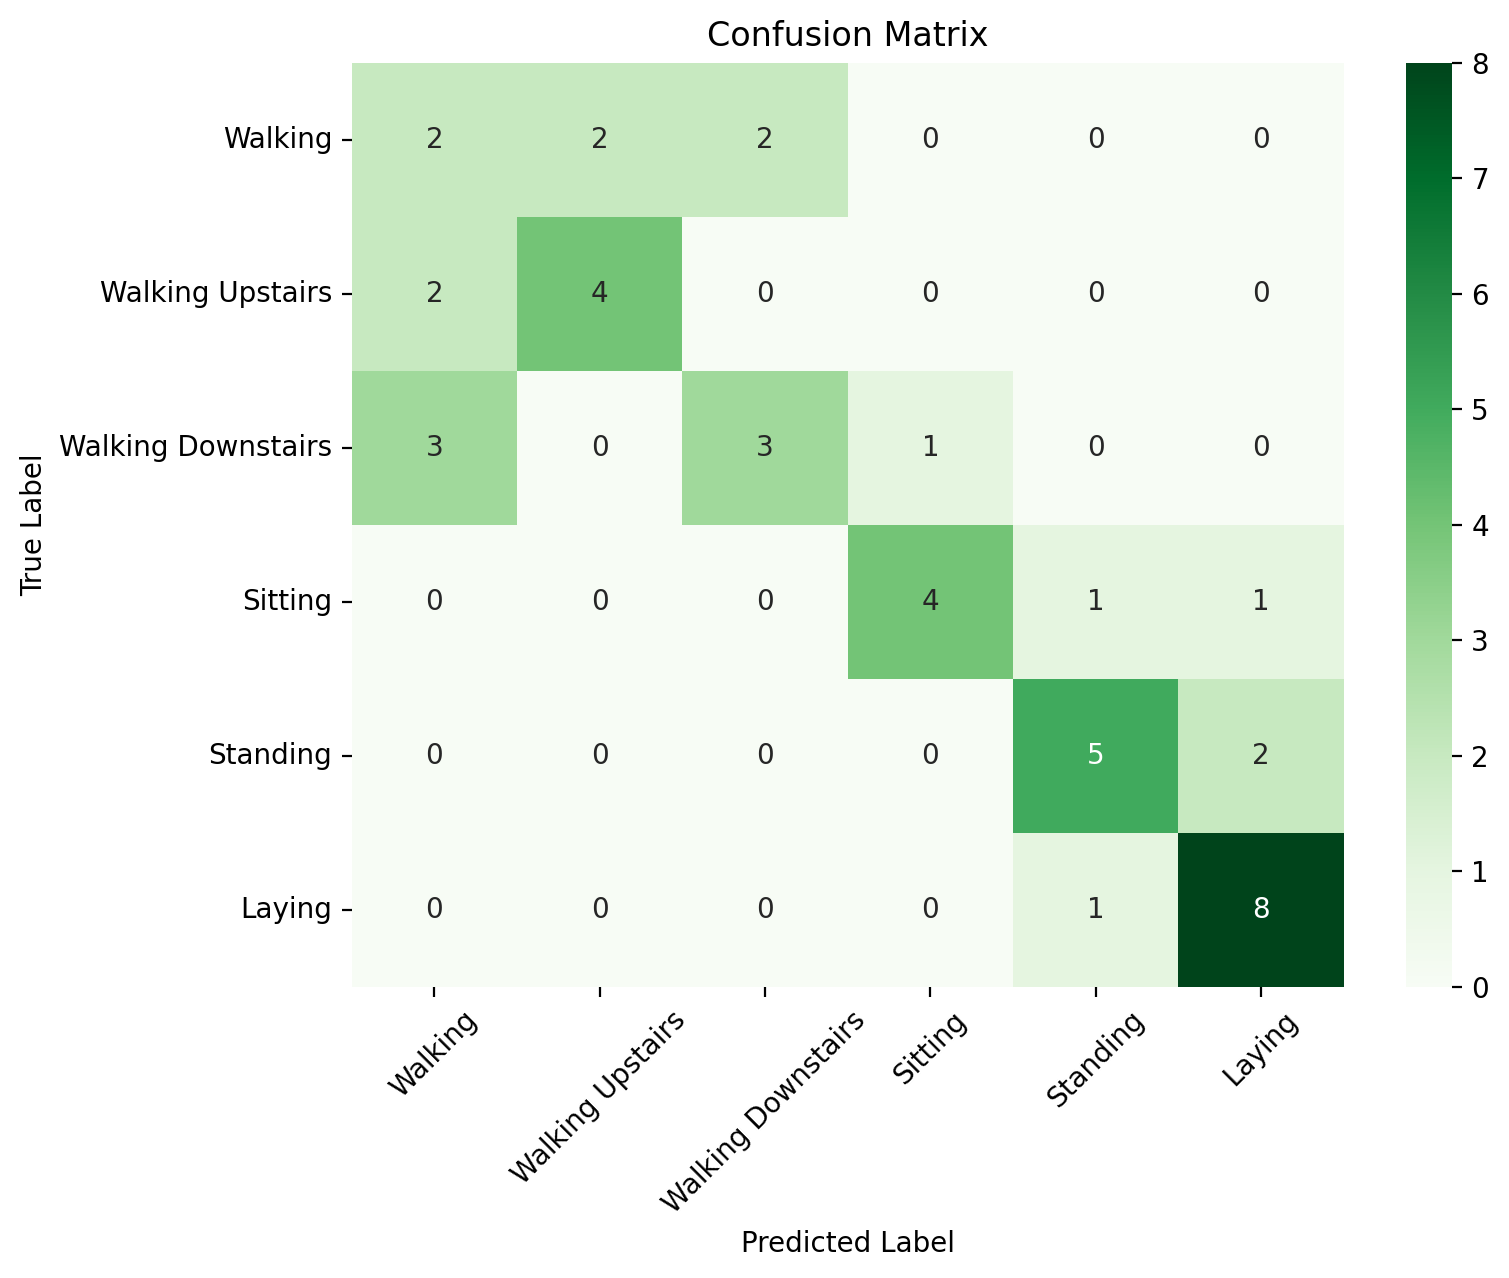

In [74]:

y_hat=sk_dt3_g.predict(xt_n)
a=skl.metrics.accuracy_score(Body_y_test,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(Body_y_test,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(Body_y_test,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(Body_y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Using Entropy

##### Making Decision Tree

In [75]:
sk_dt_e3=tree.DecisionTreeClassifier(criterion="entropy",random_state=42)
sk_dt3_e=sk_dt_e3.fit(x_n,y_n)
depth=sk_dt3_e.get_depth()
print("Depth of Decision Tree:",depth)


Depth of Decision Tree: 6


['t2_dt3_e.pkl']

##### Decision Tree Plot

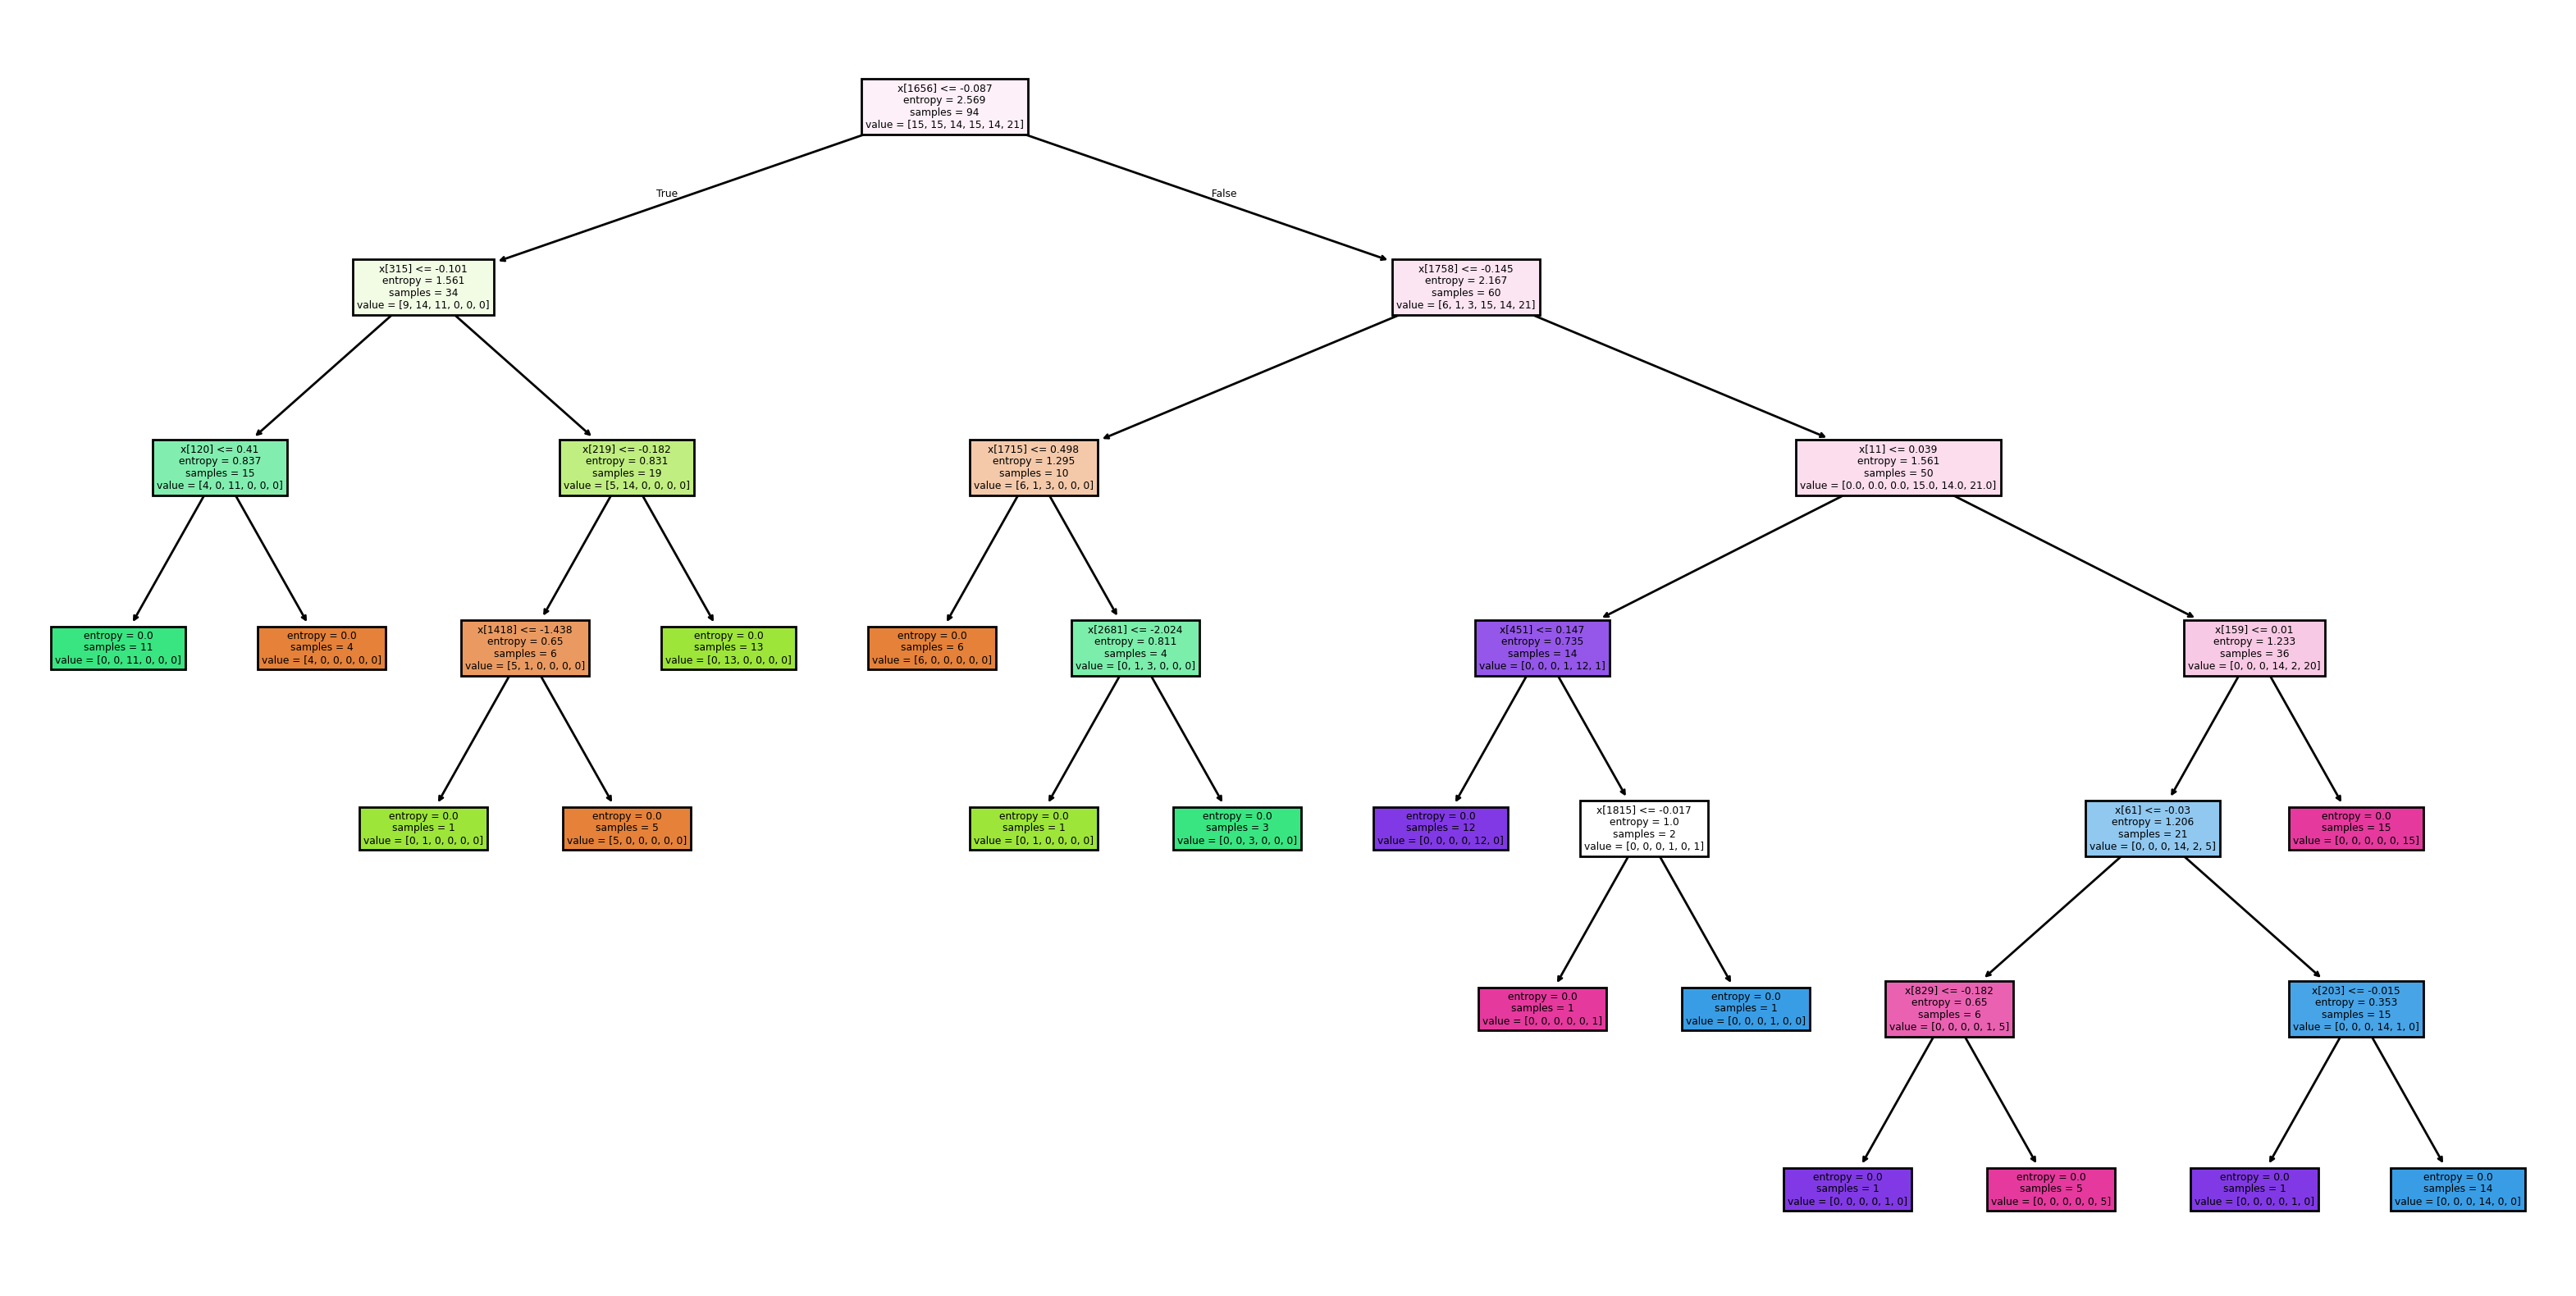

In [76]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt3_e, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  0.5853658536585366
Precision :  0.598015873015873
Recall :  0.5753968253968254


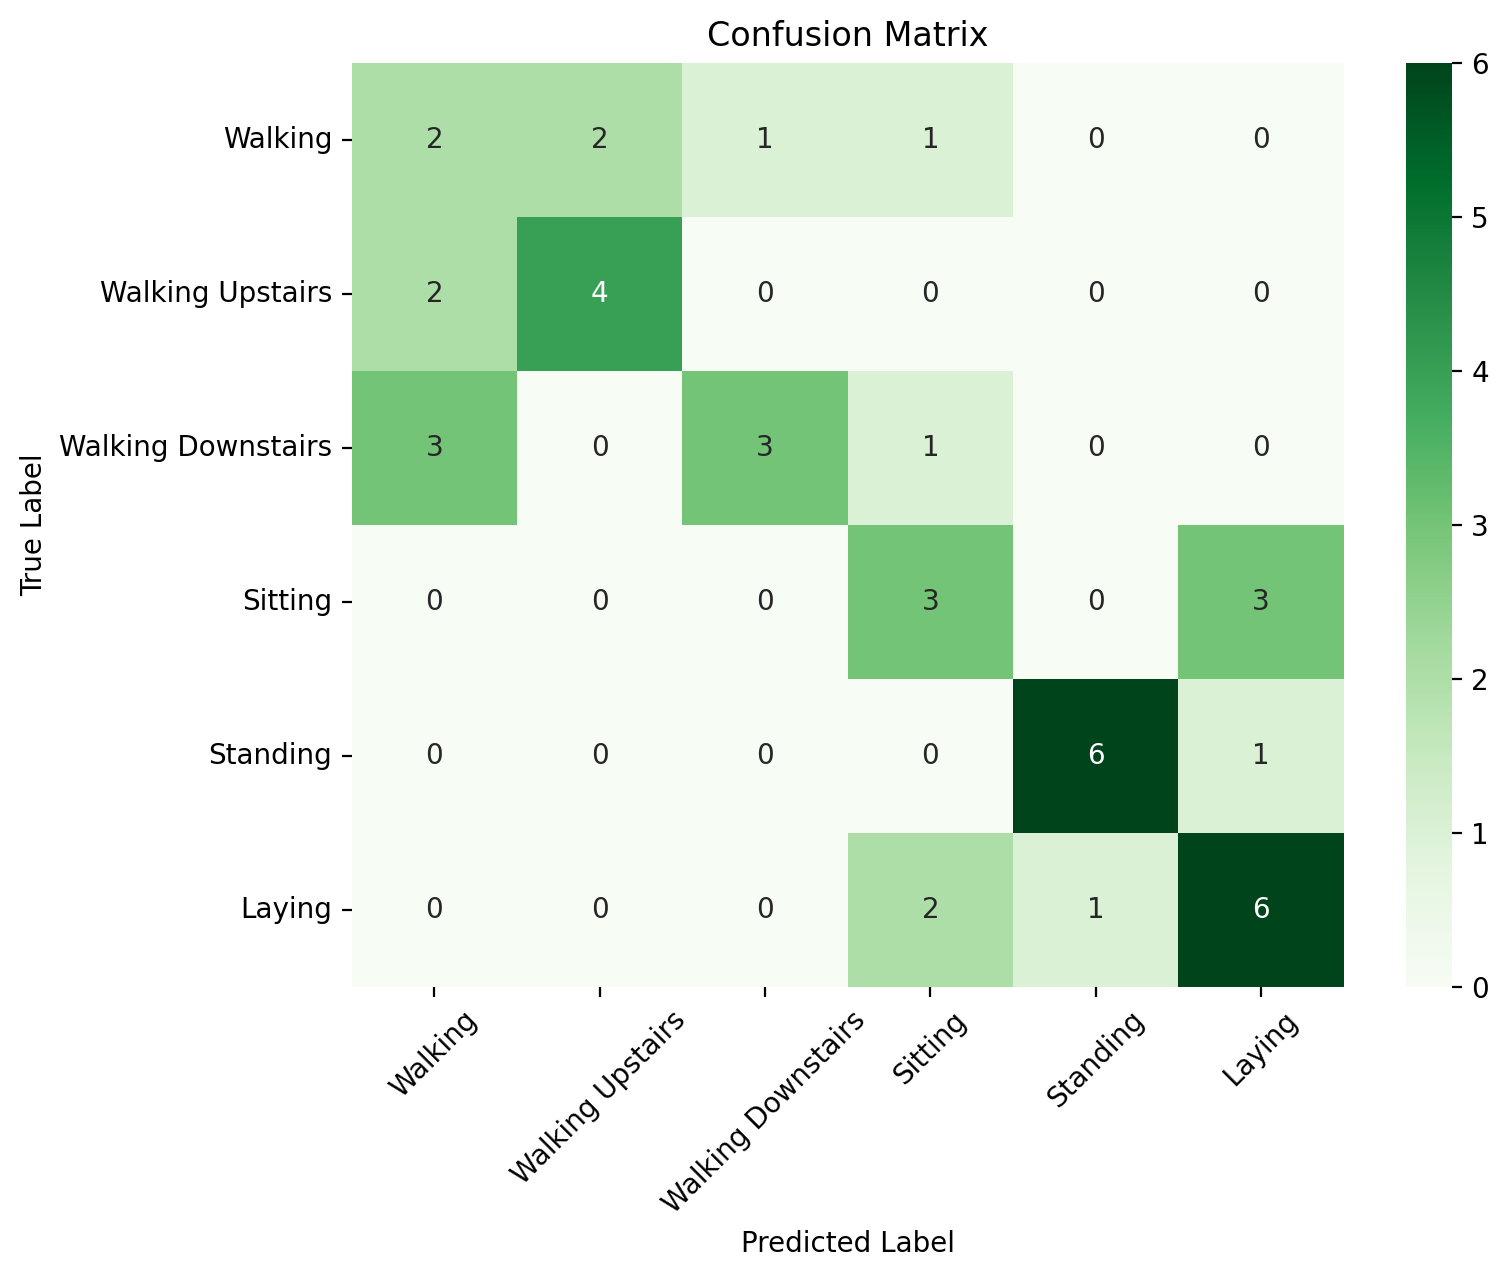

In [77]:

y_hat=sk_dt3_e.predict(xt_n)
a=skl.metrics.accuracy_score(Body_y_test,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(Body_y_test,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(Body_y_test,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(Body_y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Compare the results of the three models. Which model do you think is better?

The 2nd Decision Tree which is made using TSFEL features is working the best. The reason is that the TSFEL features deffrentiates the different classes of models properly. Also the the number of features used in 2nd Decision Tree is much more then others and thus helps model understand the classes properly and differentiate them clearly. 

Whereas, the other 2 models performs nominally well with accuracy of 50 to 60 percent. As it is predicts only on a limited number of features which might be a bit confusing for differentiating between certain activities.

## 2.Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. 

### For Decision Tree 1

#### With gini criterion

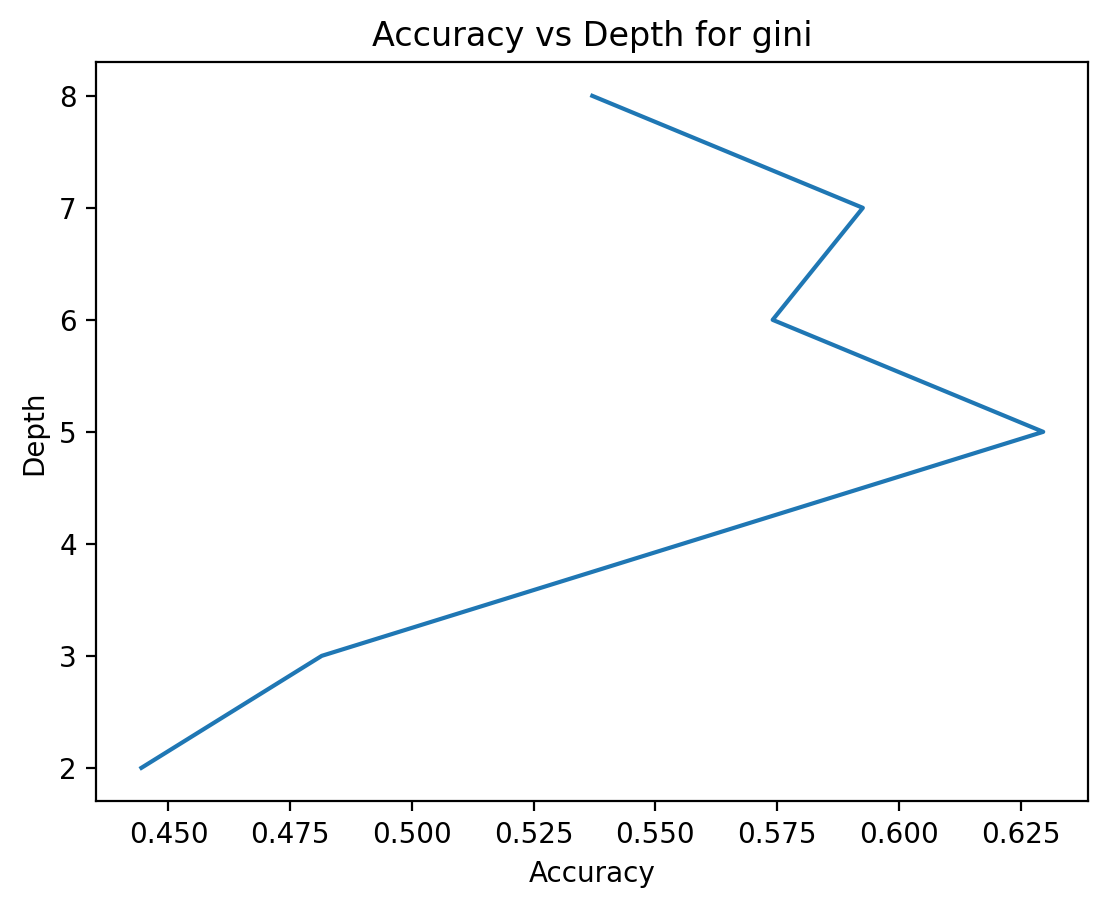

In [78]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x,y)
    y_hat1=skl_dt.predict(xt)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


#### With entropy criterion

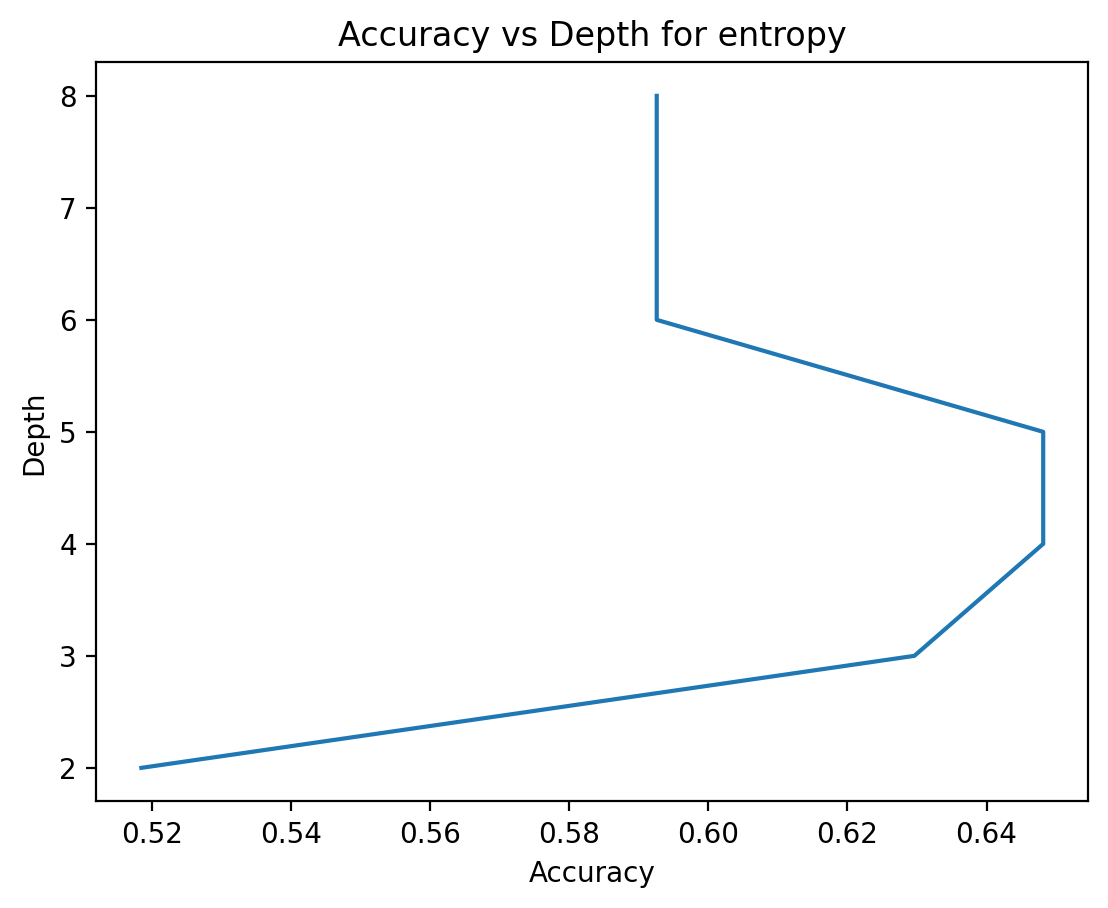

In [79]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x,y)
    y_hat1=skl_dt.predict(xt)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()


### For Decision Tree 2

#### With gini criterion

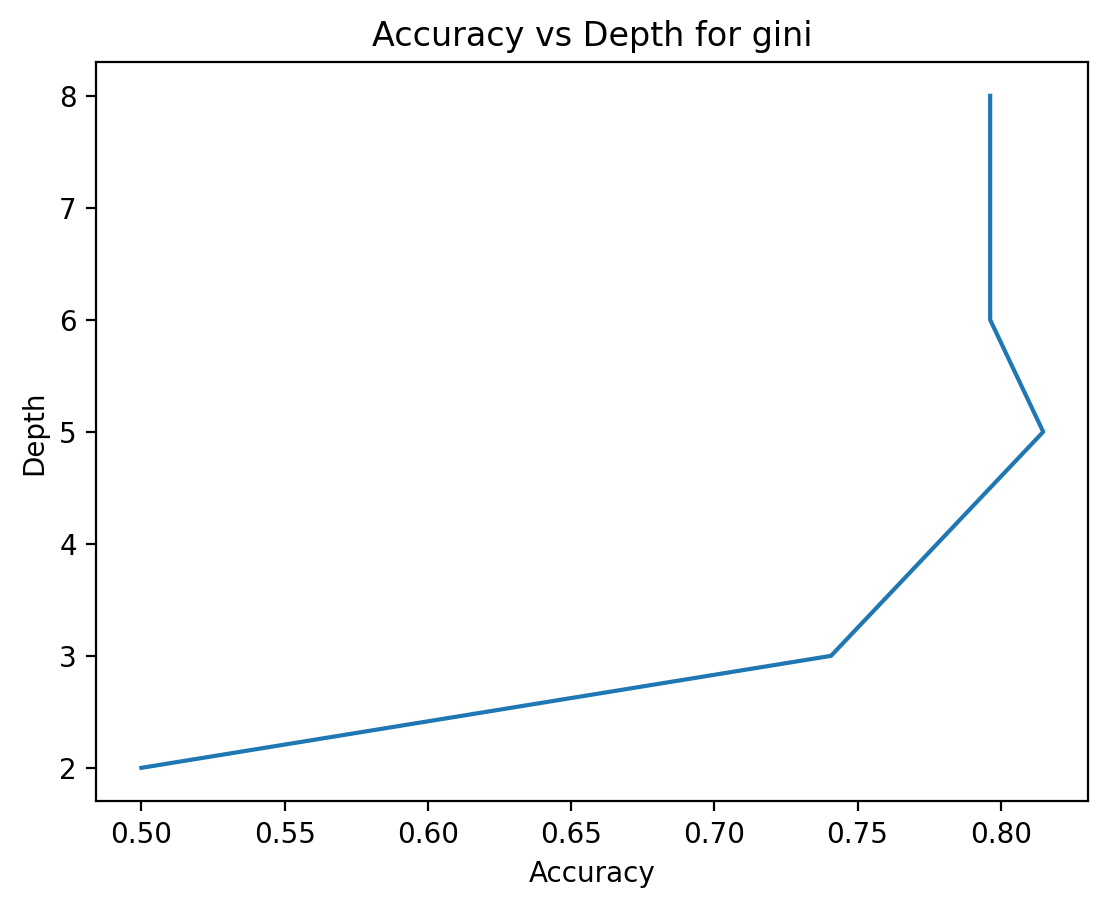

In [80]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x2,y_train)
    y_hat1=skl_dt.predict(xt2)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


#### With entropy criterion

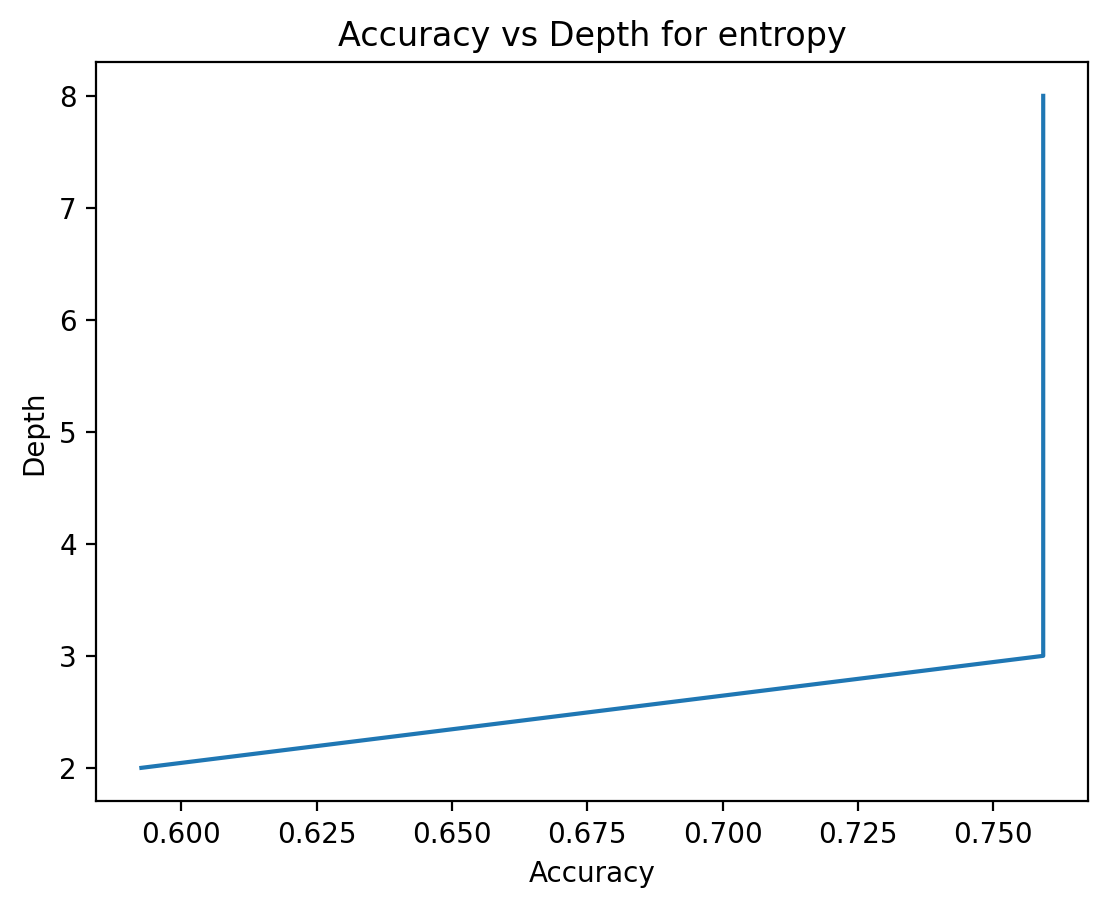

In [81]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x2,y_train)
    y_hat1=skl_dt.predict(xt2)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()


### For Decision Tree 3

#### With gini criterion

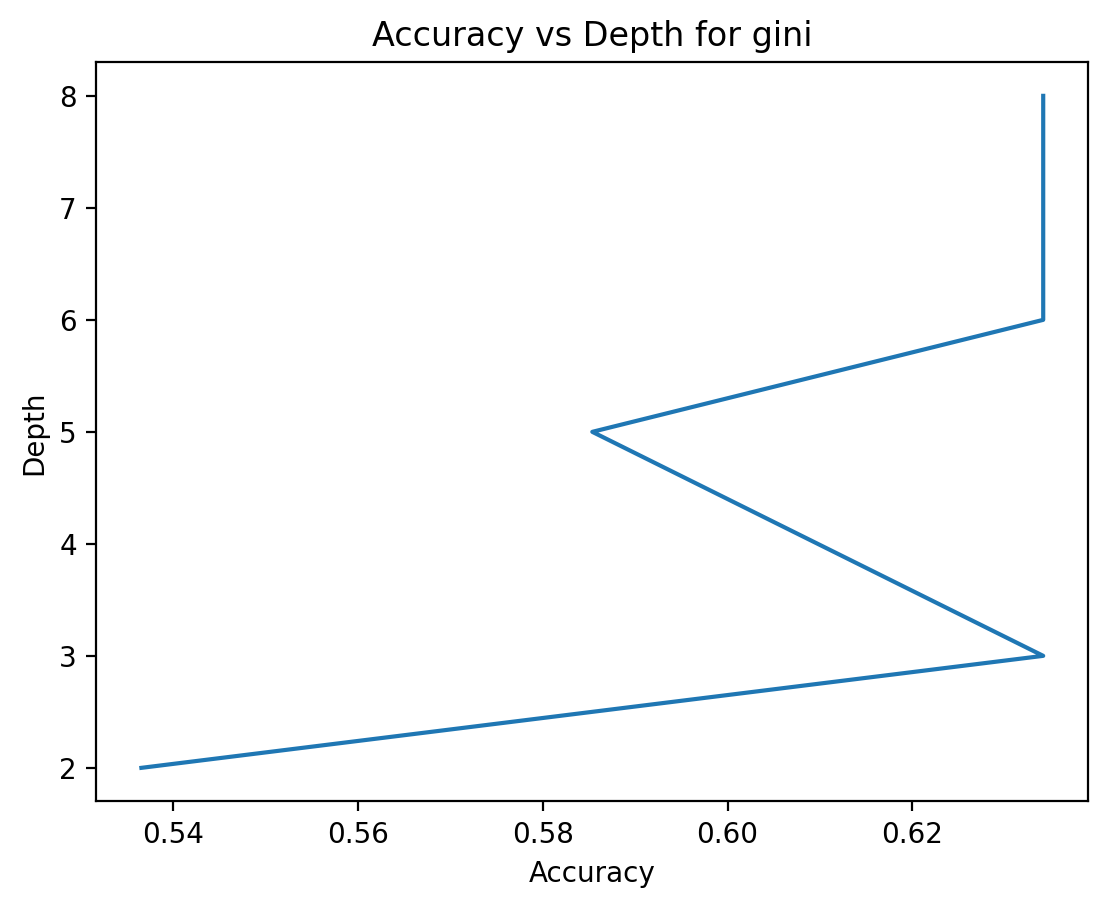

In [82]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x_n,y_n)
    y_hat1=skl_dt.predict(xt_n)
    acc=skl.metrics.accuracy_score(Body_y_test,y_hat1)
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


#### With entropy criterion

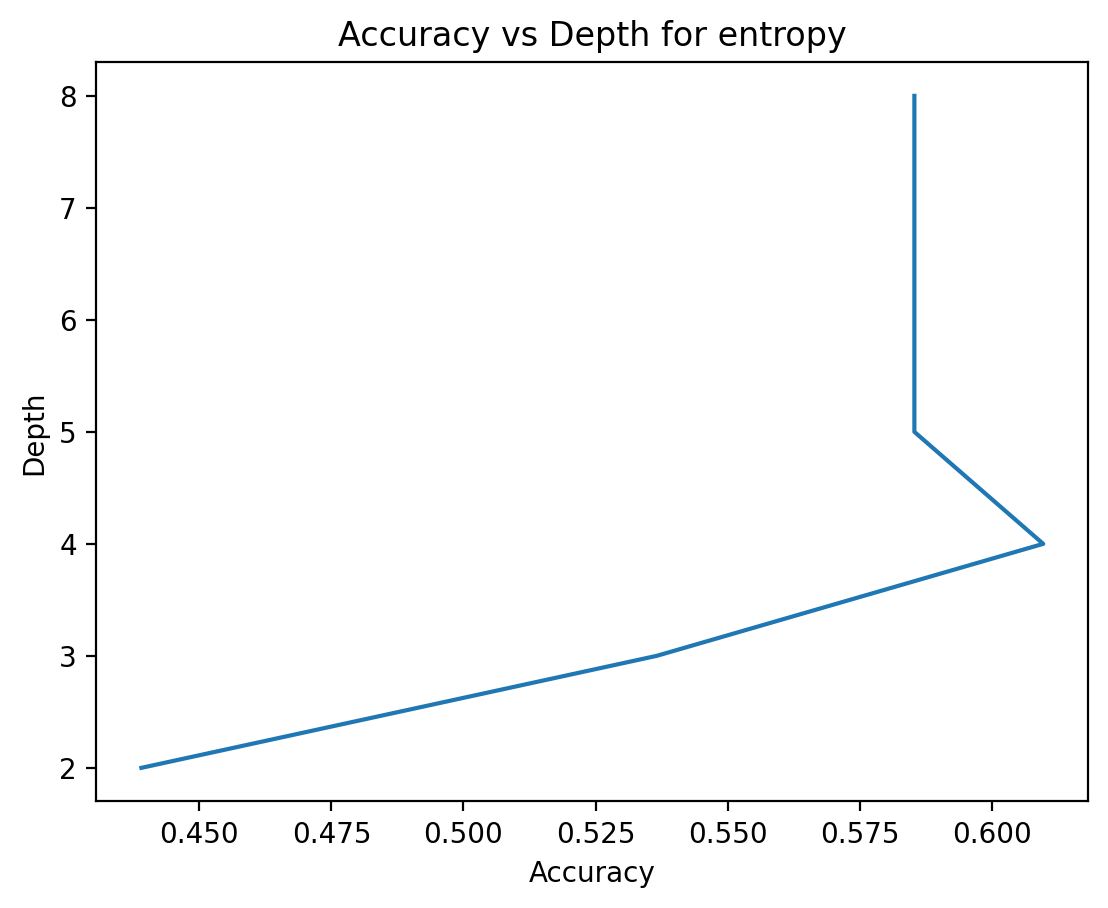

In [83]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x_n,y_n)
    y_hat1=skl_dt.predict(xt_n)
    acc=skl.metrics.accuracy_score(Body_y_test,y_hat1)
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()


## 3.Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

The models performance is bad for walking the potential reasons for that are:
1. **Similar movement patterns**: The movement patterns of Walking , Walking Downwards and Walking Upwards are very similar with minor differences in y-axis accelerations. So, the model might not be able to clearly differentiate between these activities and confuse between them.
2. **Feature Overlap**: The Features acceleration in X and Z  would be almost same for all the walking which might confuse the model as 2 of 3 Features used are very similar.
3. **Sensor Placements and Orientation Differences**: The sensor might be kept at different height or position and orientations while recording this data which might confuse the model.
4. **Variability in people** : the walking style and the height of people might be different which create a difference in the data and which might lead the model to misclassify some of them.
5. **Incline Gradient** : The Incline Gradient i.e. decrease or increase of the slope per step where the data is collected might not be very significant due to which the difference in the data points might not be very significant.